# Media Spend Cost Optimization

### <u>Team</u>
Our team members are:

&emsp; Aditya Sanjay Pawar: https://github.com/aspawarsyredu

&emsp;    Himanshu Hegde: https://github.com/himanshu-hegde-syr

&emsp;    Keerthi Krishna Aiyappan: https://github.com/KeerthiKrishna-Aiyappan

&emsp;    Sri Venkata Subhramanya Abhishek Namana: https://github.com/snamana 

&emsp;    Point of Contact: Himanshu Hegde

### <u>Overview</u>
Context
Marketing Mix Model, or Media Mix Model (MMM) is used by companies to measure how their media spending(TV, social media, email, newspapers etc.) contributes to sales, so as to optimize future budget allocation. Companies nowadays are investing millions of dollars into offline and online marketing channels to drive customer acquisition and sales. As the number of media channels increases, it gets harder and harder to track, analyze and quantify the impact of their marketing spend. The sale of a product is influenced by various factors:

- Brand image

- Product distribution

- Product pricing

- Offline and online media spend

- Competitor pricing and media spend

- Discounts and promotions

- Seasonality

- External economic factors

When you have multiple factors affecting the demand for your product, it is crucial to understand and be able to quantify how each media channel you spend on (TV, social media, email, newspapers etc.) impacts your demand. This understanding is all the more essential while optimizing the budget for company media spend, by allocating spend across different media channels efficiently.

#### <u>What we are doing to solve this</u>
The solution we are proposing involves using Bayesian and Shapley based approaches to understand the marginal(individual) contribution of each media channel to sales, the diminishing effect media spend has, ad-stock lag effect of each media channel and the cost saved by optimizing media spend.

#### <u>Our goal is to:</u>

Understand the effectiveness of different media channels in driving product sales.

Quantify Ad-Stock effect of various media channels. Ad-stock is the lagged effect between advertisement launch and consumer purchase.

Assess the Diminishing Returns of each media channel. After a certain saturation point, increasing media spend will not result in increased product sales (i.e. it will result in diminishing sales returns).
Optimize future marketing decisions and quantify its impact. 

Once we have a clear understanding on the marginal impacts of each of the media channels, we can optimize our media spends given a certain budget.

#### <u>What is new in our approach?</u>

Traditional MMM models over the years have been built using Generalized Linear models and Bayesian Statistics. Over the past few years, Shapley(Shapley Additive exPlanations) based approaches have been highly used across different domains for calculating marginal contributions of different features of a non-linear model to the target variable. However, they have not been implemented across many MMM models. We intend to explore using Shapley to understand the relationship and impact of each of the media channels towards product demand and compare these insights to ones obtained by traditional methods.

#### <u>If you are successful, what difference will it make?</u>

A successful model will result in an optimized media allocation budget and strategy, which in turn will increase demand for products, yield more revenue and help reduce unnecessary spending. Some examples of the insights are:

TV ads contribute to 20% of sales revenue, while social media contributes to 10% of the sales revenue.

Consumers start purchasing a product 2 weeks after TV ads, and 1 week after newspaper ads.

Increasing the social media spend for product A above $10k yields no increase in sales returns.

If we were to reduce the media spend budget to $30k , then investing $6k of this into newspaper ads, will see a 4% rise in product sales.

#### <u>Stakeholders</u>

1. Chief Marketing Officers (CMOs) and Marketing Teams: CMOs are under increasing pressure to demonstrate the value of marketing efforts, especially in challenging economic conditions. They need MMM to justify marketing spend by showing its impact on sales and to make informed decisions on budget allocation across various channels to optimize media performance.

2. Finance Departments: Finance teams are interested in understanding the return on investment (ROI) of marketing activities to ensure that budgets are used efficiently. They require clear, reliable metrics that link marketing spend to sales outcomes, helping in financial planning and forecasting.

3. Brand Managers: Individuals responsible for specific products or brands within a company need to understand how their marketing efforts are contributing to brand awareness, customer acquisition, and sales. They require granular insights into the effectiveness of different marketing tactics for their specific brand context.

4. Sales Teams: Sales departments benefit from understanding how marketing activities influence customer behavior and sales cycles. They need data that helps them align sales strategies with marketing efforts to maximize overall business performance.

5. Data Analysts and Data Engineers: These stakeholders are involved in the technical aspects of MMM, including data collection, model building, and analysis. They have access to the data, provide us with required data and business context, validate our insights and provide feedback.

6. Product Development Teams: Insights from MMM can inform product development by highlighting features or benefits that resonate with customers. These teams need information on how marketing for existing products impacts customer preferences and perceptions, which can guide the development of new products or improvements to existing ones.

### <u>Data</u>

The marketing spend data belongs to a shampoo advertiser, provided by Neustar MarketShare. The data was consolidated from sources such as Kantar Media, IRI, ITG, JD Power, and Rentrak.

It contains 4 years of weekly data, including weekly volume sales in ounces and media spend on major channels such as TV, magazines, display, YouTube, and search. Also available are retailer variables such as the average price per ounce, ACV weighted product distribution, discounts, and promotions. The same dataset has been used by Yuxue Jin and Yueqing Wang, when they built a marketing solution for Google in 2017.

The columns in the data can be clubbed into 3 main categories:

- Media Variables Media Impression (prefix='mdip_'): impressions of 13 media channels: direct mail, insert, newspaper, digital audio, radio, TV, digital video, social media, online display, email, SMS, affiliates, SEM.

- Media Spending (prefix='mdsp_'): spending of media channels.

- Control Variables Macro Economy (prefix='me_'): CPI, gas price. Markdown (prefix='mrkdn_'): markdown/discount. Store Count ('st_ct') Retail Holidays (prefix='hldy_'): one-hot encoded. Seasonality (prefix='seas_'): month, with Nov and Dec further broken into to weeks. One-hot encoded.

- Target Variable Sales(‘sales’): Weekly sales in Dollars.

In [1]:
# !pip install shap
1

# !pip install seaborn --upgrade

1

# <u>Preprocessing</u>

### Import required libraries

In [2]:
"""
Import required libraries

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,precision_score,recall_score
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_squared_error
from sklearn.metrics import RocCurveDisplay,roc_curve,auc
from xgboost import XGBClassifier,XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
import time
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
import re

import shap
from pprint import pprint


from IPython.display import display, HTML
display(HTML("<st yle>.container { width:80% !important; }</style>"))

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

import warnings
warnings.filterwarnings('ignore')

### Define commonly used functions

In [34]:
class data_pre_processing():
    """
    Pre process pandas dataframes
    """
    
    def df_description(df):
        print('shape : ',df.shape)
        print('dtypes :','\n',df.dtypes)
        return None

    def convert_col_names_to_lower_case(df):
        for col in df.columns:
            df = df.rename(columns = {col:col.lower()})
        return df
    
    def describe_data(df):
        display(df.describe(include='all'))
        return None
    
    def data_info(df):
        display(df.info(verbose=True, show_counts=True))
        return None

    def nulls_in_data(df):
        print(df.isnull().sum())
        return None
    
    def duplicate_rows_at_primary_key_level(df,level_of_the_data :list):
        
        df = df[df.duplicated(subset=level_of_the_data, keep=False)]
        if df.shape[0] >0:
            print(" Dataframe has duplicates, total rows with duplicates :",df.shape[0])
        else:
            print(" No duplicates in data")      
        return df
    
    def percentage_nulls_in_each_col(df):
        """
        Return a DF of total null percentage in each column
        Args:
            df (Dataframe): Input DF
        """
        NA = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (df.isna().sum()/df.shape[0]*100).tolist()],df.dtypes.tolist()], 
           columns=df.columns, index=['NA Count', 'NA Percent','Dtypes']).transpose()
        display(NA)
        
        return None

        
            
    def drop_cols(df,column_list_to_drop):
        """

        Args:
            df (Dataframe): Input Dataframe
            column_list_to_drop (List of COlumns): List of columns to be dropped from DF
            
        Result :
            df with updated columns post dropping.
        """
        
        return df.drop(columns = column_list_to_drop)
    
    def df_columns_and_dtypes_into_list(df) -> dict:
        """

        Returns Dataframe columns and respcetive dtypes as a dictionary.
        Args:
            df (Dataframe): Input Dataframe

        Returns:
            dict: {col1:dtype,col2:dtype2}
        """
        
        return {df.columns.tolist()[i] : str(df.dtypes.tolist()[i]) for i in range(len(df.columns)) }
    
    
    def convert_dtypes_from_dict(df, col_to_dtype_mapping_dict : dict ):
        """
        df : Input Dataframe
        col_to_dtype_mapping_dict: {column:dtype}
        
        return : df with updated dtypes
        
        """
        print('Converting Column Datatypes')
        for col,dtype in col_to_dtype_mapping_dict.items():
            try:
                if col in df.columns:
                    if dtype == 'string':
                        df[col] = df[col].astype(str)
                    elif dtype == 'int':
                        df[col] = df[col].astype(int)
                    elif dtype == 'float':
                        df[col] = df[col].astype(float)
                    elif dtype == 'datetime':
                        df[col] = pd.to_datetime(df[col])
            except Exception as e:
                print('Error processing : ',col, ' ; ',e)
        return df
    


    def ydata_profiling(df):
        """
        Run ydata_profile library for data
        Args:
            df (Dataframe): Df to be profiled

        Returns:
            _type_: _description_
        """
        # !pip install ydata-profiling --ignore-installed llvmlite --user
        # from ydata_profiling import ProfileReport
        # or
        # !pip install ydata-profiling==4.1.2
        # !pip install pydantic==2.6.0 --user
        from ydata_profiling import ProfileReport
        profile = ProfileReport(df)
        
        return profile
    


    def process_nulls_in_df(df,null_columns)-> pd.core.frame.DataFrame:
        """_summary_

        Args:
            df (_type_): _description_
            null_columns (_type_): _description_

        Returns:
            pd.core.frame.DataFrame: _description_
        """
    

        
        return None
    
def plot_line_charts_with_lags(df, x_variable, y_variable='sales'):
    """
    Creates a 1x3 matrix of line charts with the specified x variable and sales over time,
    including charts with 1-week and 2-week lags for the x variable, all scaled based on Z-scores.

    Args:
    - df (DataFrame): The dataset containing the variables.
    - x_variable (str): The name of the x variable to plot against time.
    - y_variable (str): The name of the y variable, default is 'sales'.
    """

    # Ensuring the date column is in datetime format
    df['week_start_date'] = pd.to_datetime(df['week_start_date'])

    # Creating lagged variables
    df[f'{x_variable}_lag1'] = df[x_variable].shift(-1)
    df[f'{x_variable}_lag2'] = df[x_variable].shift(-2)

    # Scaling the variables based on Z-scores
    scaler = StandardScaler()
    scaled_vars = scaler.fit_transform(df[[y_variable, x_variable, f'{x_variable}_lag1', f'{x_variable}_lag2']].dropna())
    df_scaled = pd.DataFrame(scaled_vars, columns=[y_variable, x_variable, f'{x_variable}_lag1', f'{x_variable}_lag2'])

    # Setting up the figure for plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Because scaling and shifting may lead to a different number of rows, we need to align the date index.
    dates = df['week_start_date'][-len(df_scaled):]

    # Original variable line chart
    axes[0].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[0].plot(dates, df_scaled[x_variable], label=x_variable, color='red')
    axes[0].set_title(f'Original {y_variable} and {x_variable} (Scaled)')
    axes[0].legend(loc='upper left')

    # 1-week lag line chart
    axes[1].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[1].plot(dates, df_scaled[f'{x_variable}_lag1'], label=f'{x_variable} (1-week lag)', color='red')
    axes[1].set_title(f'{y_variable} and 1-week Lag of {x_variable} (Scaled)')
    axes[1].legend(loc='upper left')

    # 2-week lag line chart
    axes[2].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[2].plot(dates, df_scaled[f'{x_variable}_lag2'], label=f'{x_variable} (2-week lag)', color='red')
    axes[2].set_title(f'{y_variable} and 2-week Lag of {x_variable} (Scaled)')
    axes[2].legend(loc='upper left')

    
    for ax in axes:
        ax.set_xlabel('Date')
        ax.set_ylabel('Scaled Value')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

### Load Dataset

In [4]:
"""
Read the dataset.

Four years' (209 weeks) records of sales, media impression and media spending at weekly level.

1. Media Variables

Media Impression (prefix='mdip_'): impressions of 13 media channels: direct mail, insert, newspaper, digital audio, radio, TV, digital video, social media, online display, email, SMS, affiliates, SEM.
Media Spending (prefix='mdsp_'): spending of media channels.
2. Control Variables

Macro Economy (prefix='me_'): CPI, gas price.
Markdown (prefix='mrkdn_'): markdown/discount.
Store Count ('st_ct')
Retail Holidays (prefix='hldy_'): one-hot encoded.
Seasonality (prefix='seas_'): month, with Nov and Dec further broken into to weeks. One-hot encoded.
3. Sales Variable ('sales')

"""
    
mmm_df = pd.read_csv('MMM_Data.csv')
print(mmm_df.shape)




(209, 80)


### Treat column headers - Renaming, Lowercasing, Datatype Formatting

In [5]:
"""
Define new names for columns.
Re-map column names.

"""

mmm_df2 = mmm_df.copy()

mapped_columns_dict = {'mdip_':'media_impression_',\
                        'mdsp_':'media_spend_',\
                        'me_': 'macro_econ_',\
                        'mrkdn_':'markdown_discount_',\
                        'st_ct':'store_count',\
                        'wk_strt_dt':'week_start_date',\
                        'wk_in_yr_nbr':'week_in_year',\
                        'yr_nbr':'year',\
                        'qtr_nbr':'quarter',\
                        'prd':'period',\
                        'wk_nbr':'week_in_month',\
                        '_dm':'_direct_mail',\
                        '_inst':'_insert',\
                        '_nsp':'_newspaper',\
                        '_auddig':'_dig_audio',\
                        '_audtr':'_radio',\
                        '_vidtr':'_tv',\
                        '_viddig':'_dig_video',\
                        '_so':'_social_media',\
                        '_on':'_online display',\
                        '_em':'_email',\
                        '_sms':'_sms',\
                        }

datatype_mapping = {'week_start_date':'datetime'}

# Map column names
for short_form,long_form in mapped_columns_dict.items():
    for col in mmm_df2.columns:
        if short_form in col:
            new_col_name = re.sub(short_form,long_form,col)
            # print(short_form,"--> ",col,"--> ",new_col_name)
            mmm_df2 = mmm_df2.rename(columns={col:new_col_name})


# Lowercase column names
mmm_df2 = data_pre_processing.convert_col_names_to_lower_case(mmm_df2)

# String to Date conversion
mmm_df2 = data_pre_processing.convert_dtypes_from_dict(df = mmm_df2,col_to_dtype_mapping_dict=datatype_mapping)





Converting Column Datatypes


### Define continuous,categorical(already one-hot encoded) and target columns

In [6]:
"""
Define continuous,categorical and target column

"""


continuous_column = [ 'media_impression_direct_mail', 'media_impression_insert',
       'media_impression_newspaper', 'media_impression_dig_audio',
       'media_impression_radio', 'media_impression_tv',
       'media_impression_dig_video', 'media_impression_social_media',
       'media_impression_online display', 'media_impression_email',
       'media_impression_sms', 'media_impression_aff', 'media_impression_sem',
       'media_spend_direct_mail', 'media_spend_insert',
       'media_spend_newspaper', 'media_spend_dig_audio', 'media_spend_radio',
       'media_spend_tv', 'media_spend_dig_video', 'media_spend_social_media',
       'media_spend_online display', 'media_spend_sem',
       'macro_econ_ics_all', 'macro_econ_gas_dpg', 'store_count',
       'markdown_discount_valadd_edw', 'markdown_discount_pdm']

one_hot_encoded_columns = ["hldy_black friday",
       "hldy_christmas day", "hldy_christmas eve", "hldy_columbus day",
       "hldy_cyber monday", "hldy_day after christmas", "hldy_easter",
       "hldy_father's day", "hldy_green monday", "hldy_july 4th",
       "hldy_labor day", "hldy_mlk", "hldy_memorial day", "hldy_mother's day",
       "hldy_nye", "hldy_new year's day", "hldy_pre thanksgiving",
       "hldy_presidents day", "hldy_prime day", "hldy_thanksgiving",
       "hldy_valentine's day", "hldy_veterans day", "seas_period_1",
       "seas_period_2", "seas_period_3", "seas_period_4", "seas_period_5",
       "seas_period_6", "seas_period_7", "seas_period_8", "seas_period_9",
       "seas_period_12", "seas_week_40", "seas_week_41", "seas_week_42",
       "seas_week_43", "seas_week_44", "seas_week_45", "seas_week_46",
       "seas_week_47", "seas_week_48"]

date_columns = ['week_start_date', 'year', 'quarter', 'period', 'week_in_month','week_in_year']

target_column = ["sales"]



### Missing data check

There is no missing data.

In [7]:
"""
Missing Data Check

"""

# Select Required Columns
cols_to_perform_eda = ["week_start_date","year","quarter","period","week_in_year","media_impression_direct_mail","media_impression_insert","media_impression_newspaper","media_impression_dig_audio","media_impression_radio","media_impression_tv","media_impression_dig_video","media_impression_social_media","media_impression_online display","media_impression_email","media_impression_sms","media_impression_aff","media_impression_sem","media_spend_direct_mail","media_spend_insert","media_spend_newspaper","media_spend_dig_audio","media_spend_radio","media_spend_tv","media_spend_dig_video","media_spend_social_media","media_spend_online display","media_spend_sem","sales","macro_econ_ics_all","macro_econ_gas_dpg","store_count","markdown_discount_valadd_edw","markdown_discount_pdm","hldy_black friday","hldy_christmas day","hldy_christmas eve","hldy_cyber monday","hldy_day after christmas","hldy_pre thanksgiving","hldy_prime day","hldy_thanksgiving",]

mmm_df3 = mmm_df2.copy()

mmm_df3 = mmm_df3[cols_to_perform_eda].reset_index(drop=True)

data_null_percentage = data_pre_processing.percentage_nulls_in_each_col(df =mmm_df3 )



NA Count NA Percent          Dtypes
week_start_date                        0      0.00%  datetime64[ns]
year                                   0      0.00%           int64
quarter                                0      0.00%           int64
period                                 0      0.00%           int64
week_in_year                           0      0.00%           int64
media_impression_direct_mail           0      0.00%           int64
media_impression_insert                0      0.00%           int64
media_impression_newspaper             0      0.00%           int64
media_impression_dig_audio             0      0.00%           int64
media_impression_radio                 0      0.00%           int64
media_impression_tv                    0      0.00%           int64
media_impression_dig_video             0      0.00%           int64
media_impression_social_media          0      0.00%           int64
media_impression_online display        0      0.00%           int64
media_impression_email                 0      0.00%           int64
media_impression_sms                   0      0.00%           int64
media_impression_aff                   0      0.00%           int64
media_impression_sem                   0      0.00%           int64
media_spend_direct_mail                0      0.00%         float64
media_spend_insert                     0      0.00%         float64
media_spend_newspaper                  0      0.00%         float64
media_spend_dig_audio                  0      0.00%         float64
media_spend_radio                      0      0.00%         float64
media_spend_tv                         0      0.00%         float64
media_spend_dig_video                  0      0.00%         float64
media_spend_social_media               0      0.00%         float64
media_spend_online display             0      0.00%         float64
media_spend_sem                        0      0.00%         float64
sales                                  0      0.00%         float64
macro_econ_ics_all                     0      0.00%         float64
macro_econ_gas_dpg                     0      0.00%         float64
store_count                            0      0.00%         float64
markdown_discount_valadd_edw           0      0.00%         float64
markdown_discount_pdm                  0      0.00%         float64
hldy_black friday                      0      0.00%           int64
hldy_christmas day                     0      0.00%           int64
hldy_christmas eve                     0      0.00%           int64
hldy_cyber monday                      0      0.00%           int64
hldy_day after christmas               0      0.00%           int64
hldy_pre thanksgiving                  0      0.00%           int64
hldy_prime day                         0      0.00%           int64
hldy_thanksgiving                      0      0.00%           int64

### Target(Sales) data analysis - Distribution and Over-Time

- We observe that sales in the last quarter is much higher than the previous querters in the years 2015-2017.

- We see from the distributions that most of the sales are multi-modally distributed. This will be accounted for when selecting the model to be run.



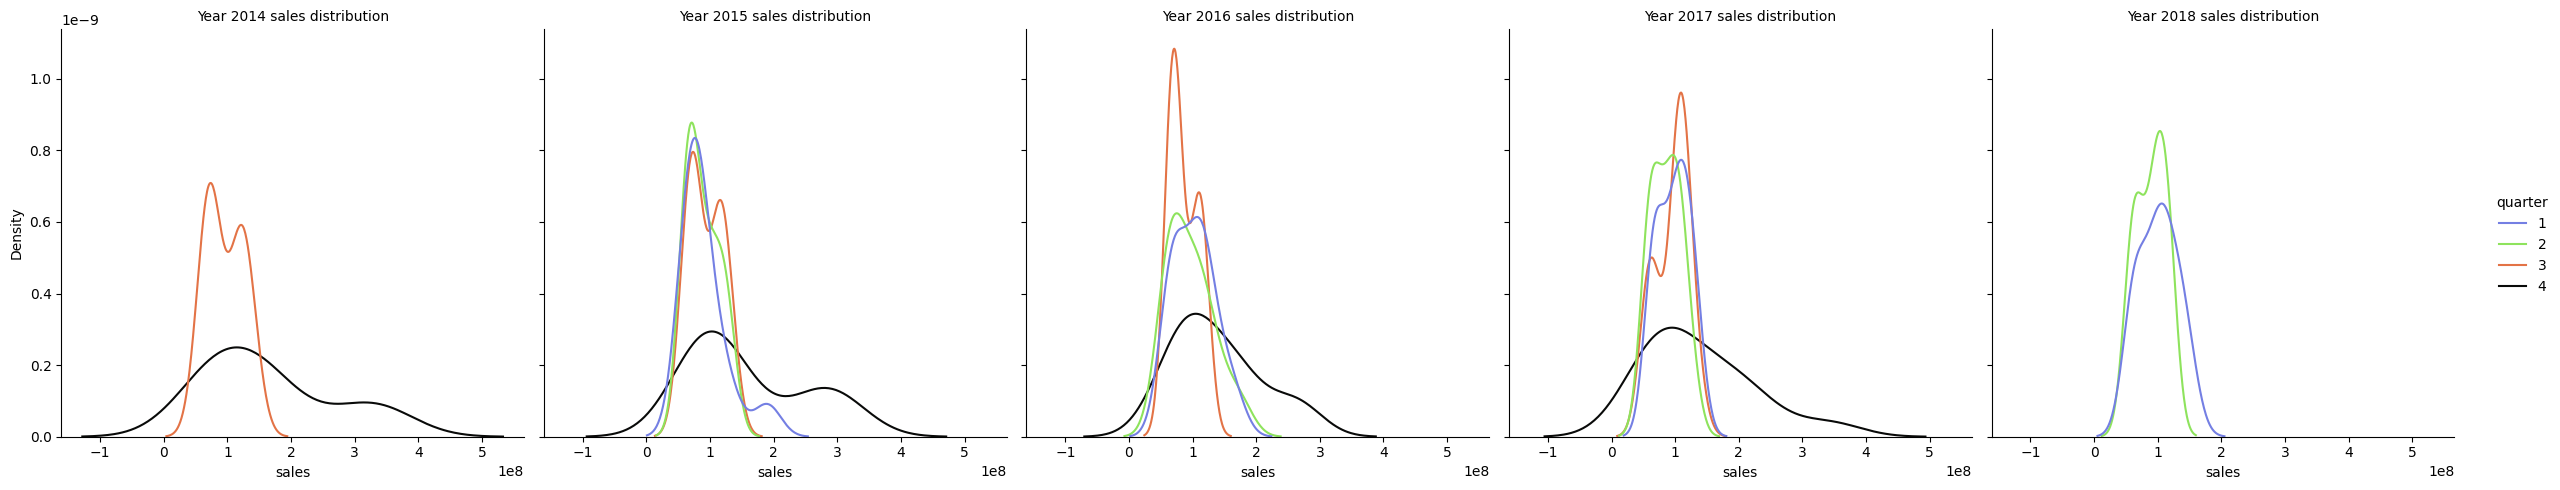

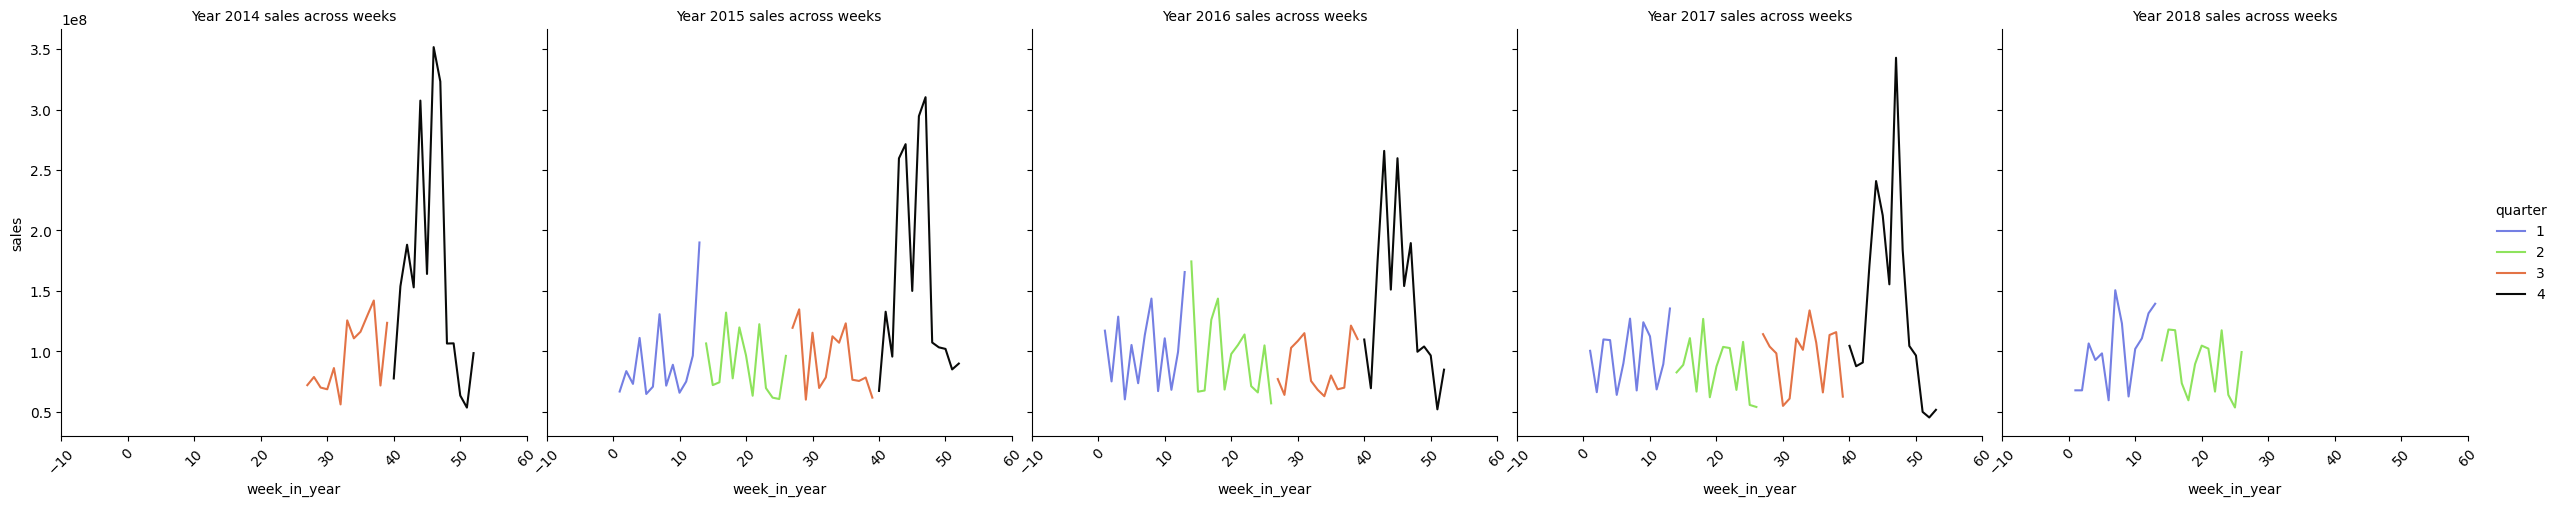

In [8]:
"""

Target (Sales) Data Analysis 

"""
colors = ['#747FE3', '#8EE35D', '#E37346','#090a09']


# 1) Distribution
ax = sns.displot(data=mmm_df3, x=target_column[0],col="year",hue= "quarter", kind="kde", palette=colors)
title = "sales distribution"
ax.set_titles("Year {col_name} " + title)
plt.show()

# 2) Sales over time
ax = sns.relplot(data = mmm_df3,x = "week_in_year", y = target_column[0],kind = "line",col= "year",hue='quarter', palette=colors).set_xticklabels(rotation = 45);
title = "sales across weeks"   
ax.set_titles("Year {col_name} " + title)
plt.show()

### Continuous Feature Distribtuion Analysis

- Multi modal distribtutions followed by most Media Spend and Media Impression veriables. 

- These distributions will be taken into account while choosing appropriate models

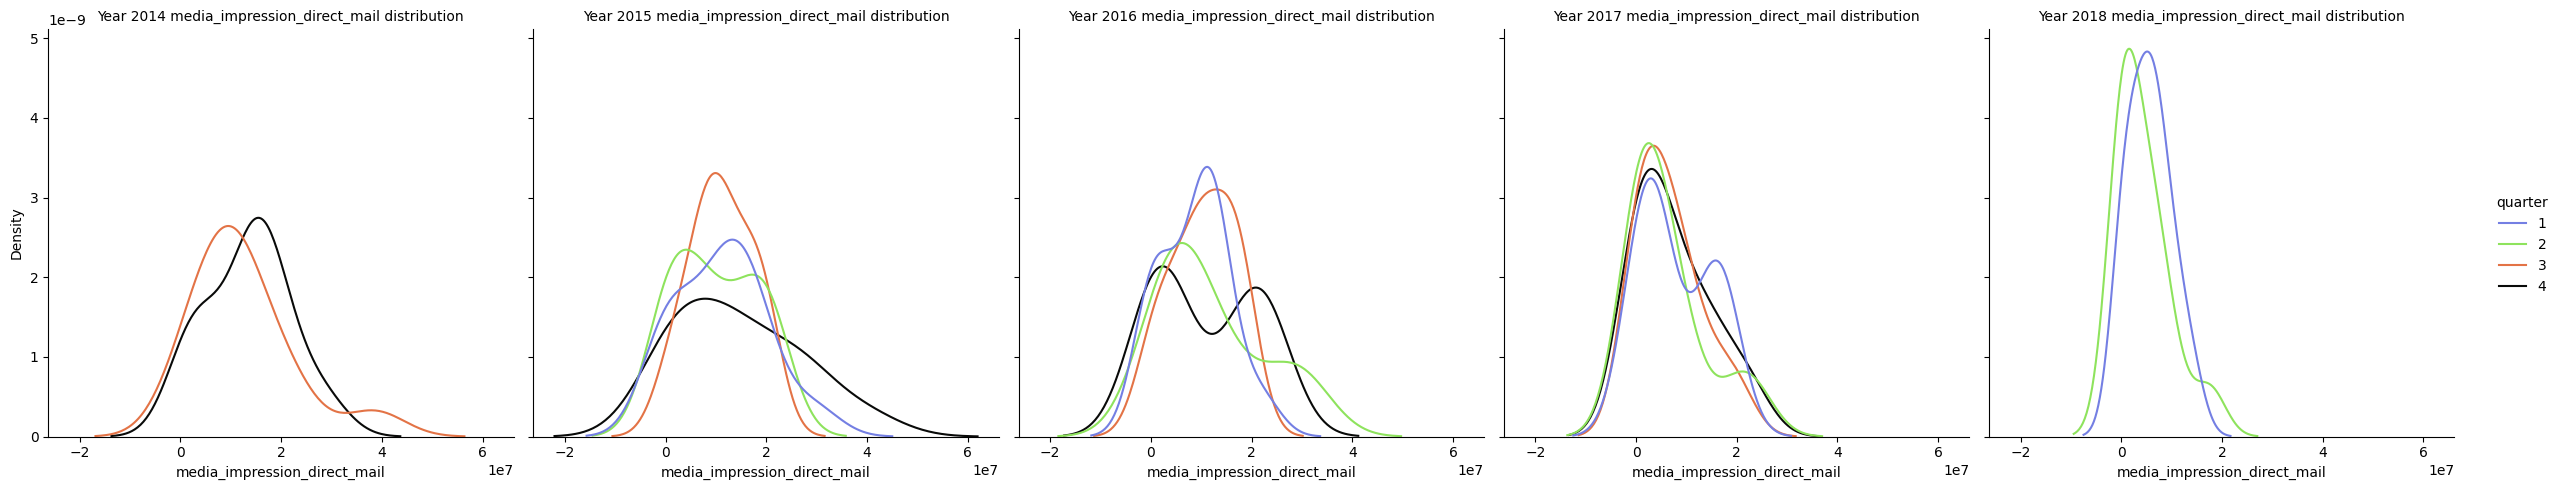

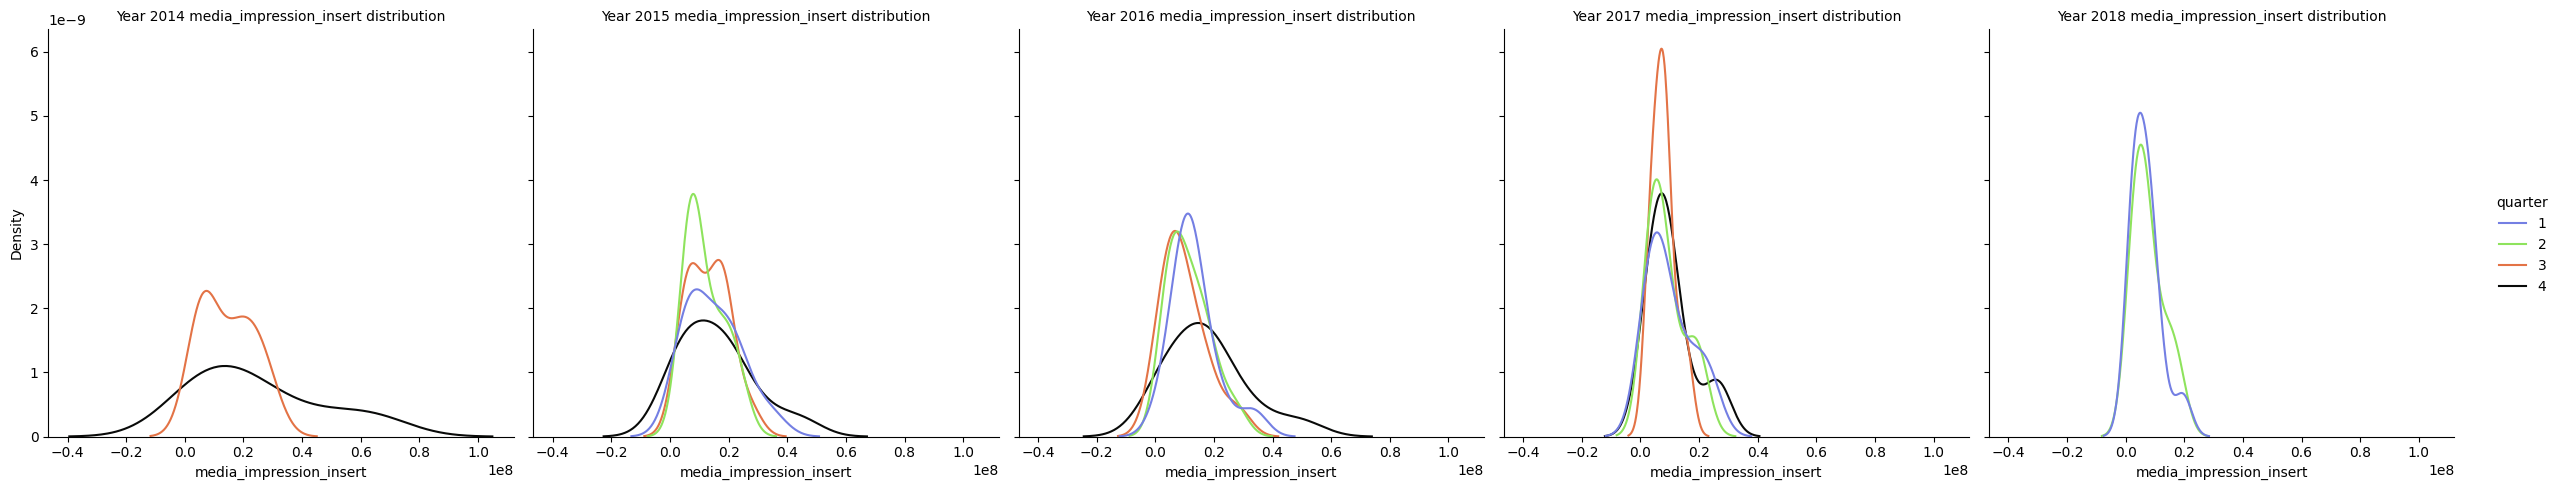

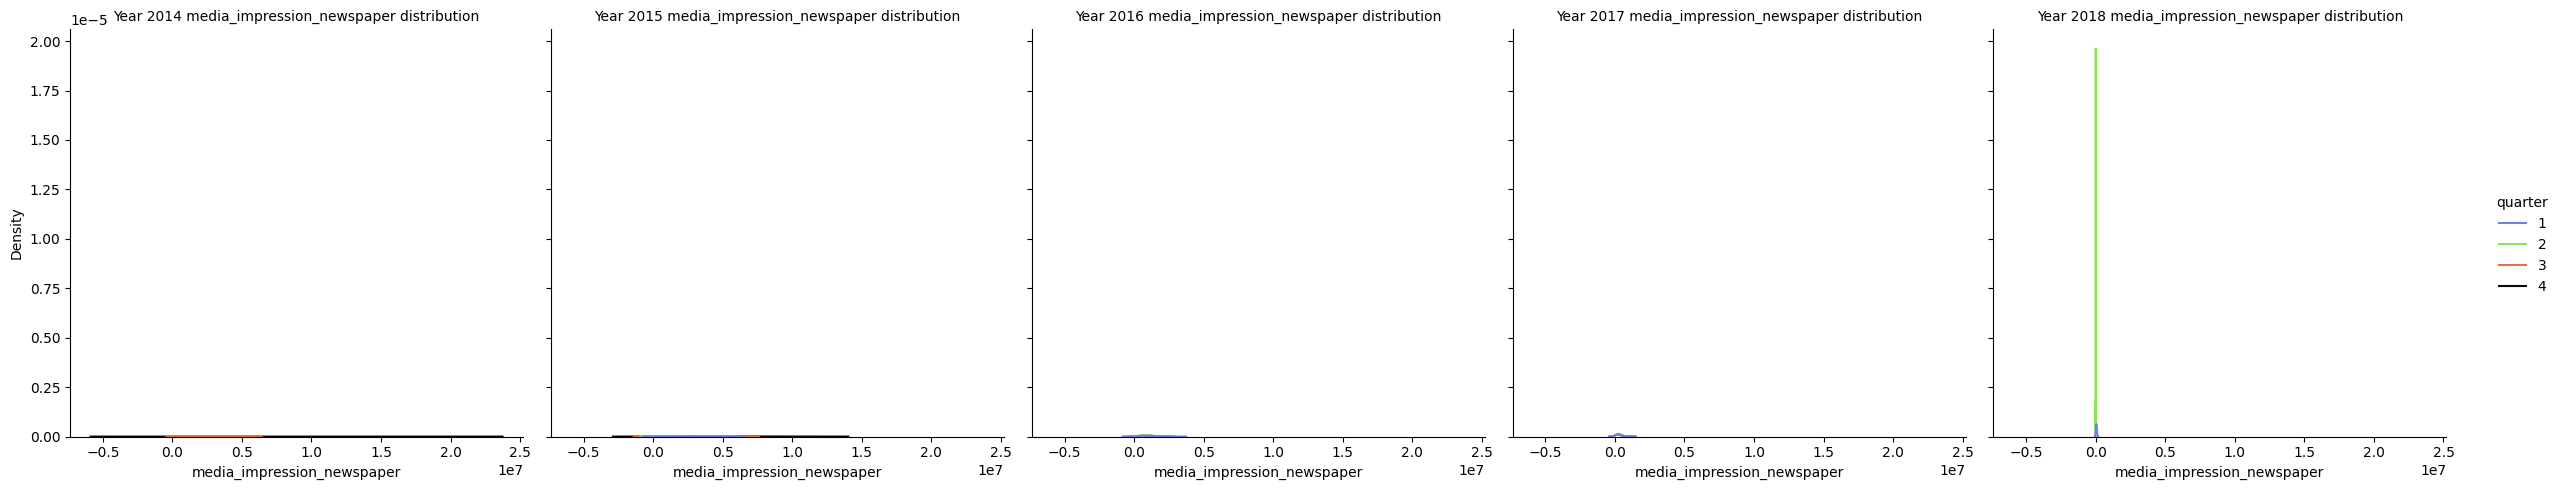

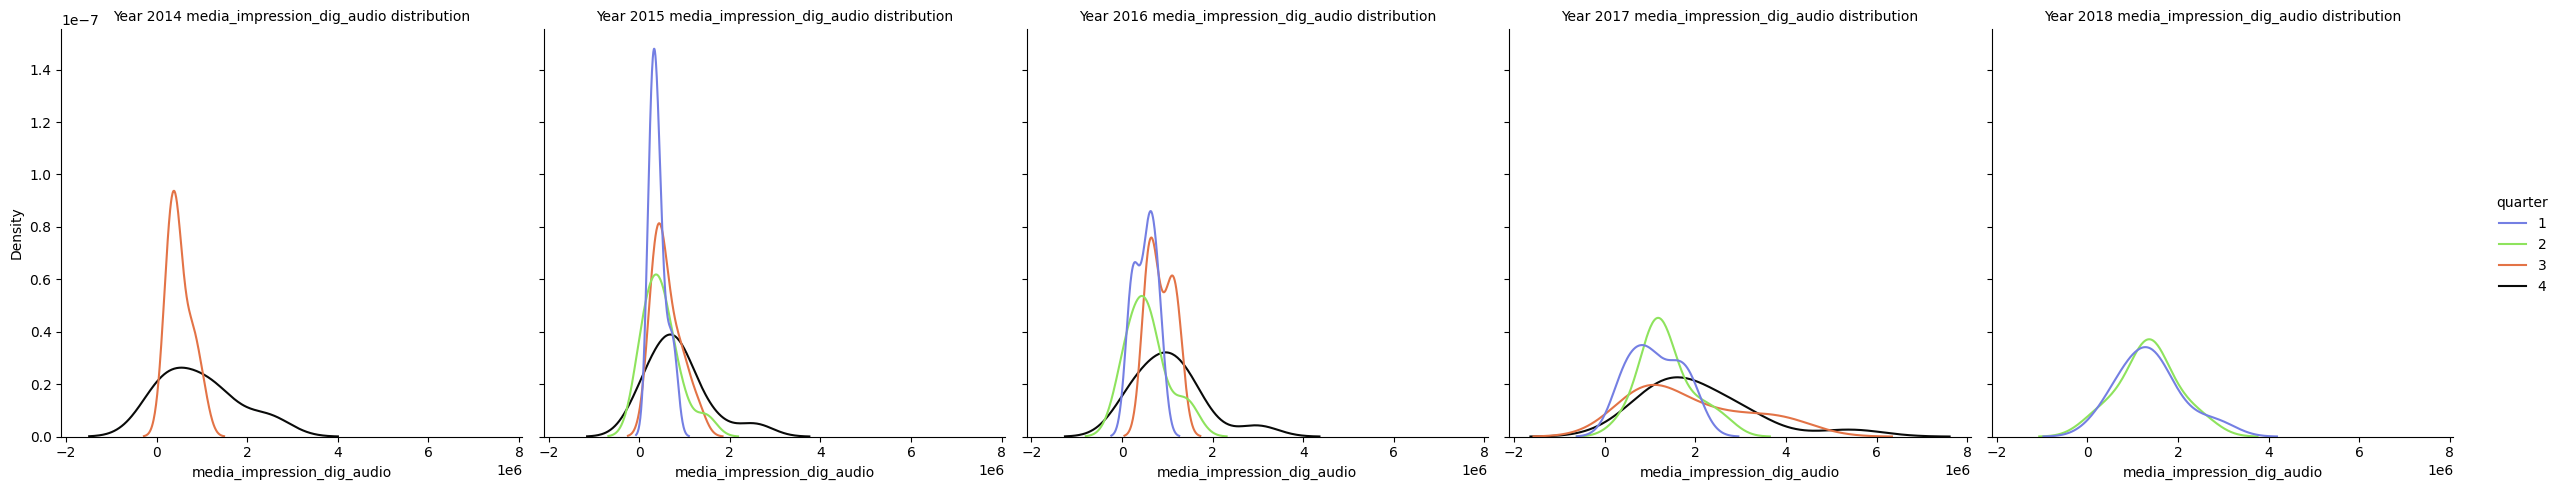

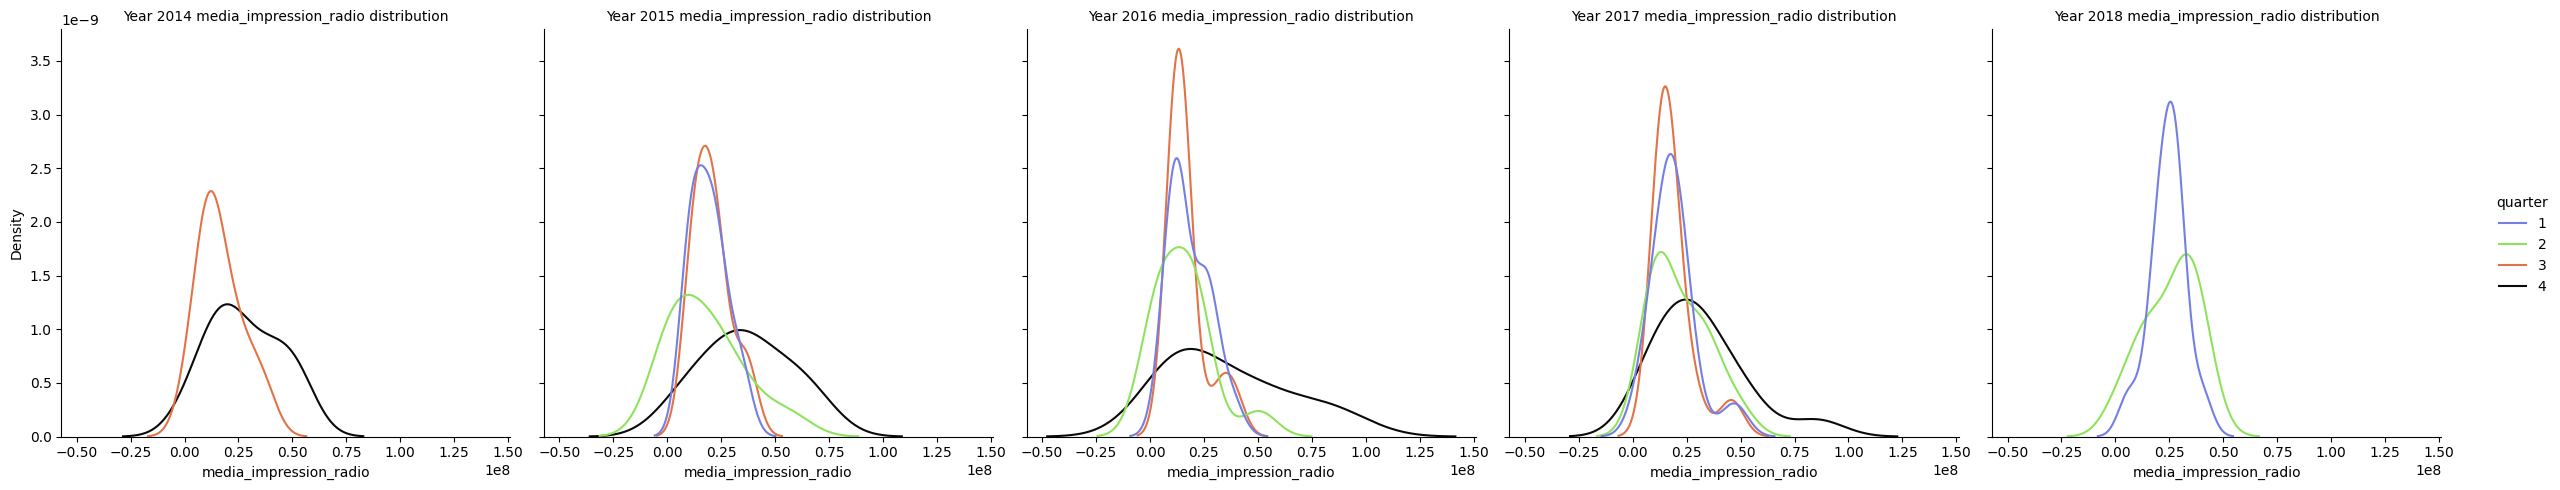

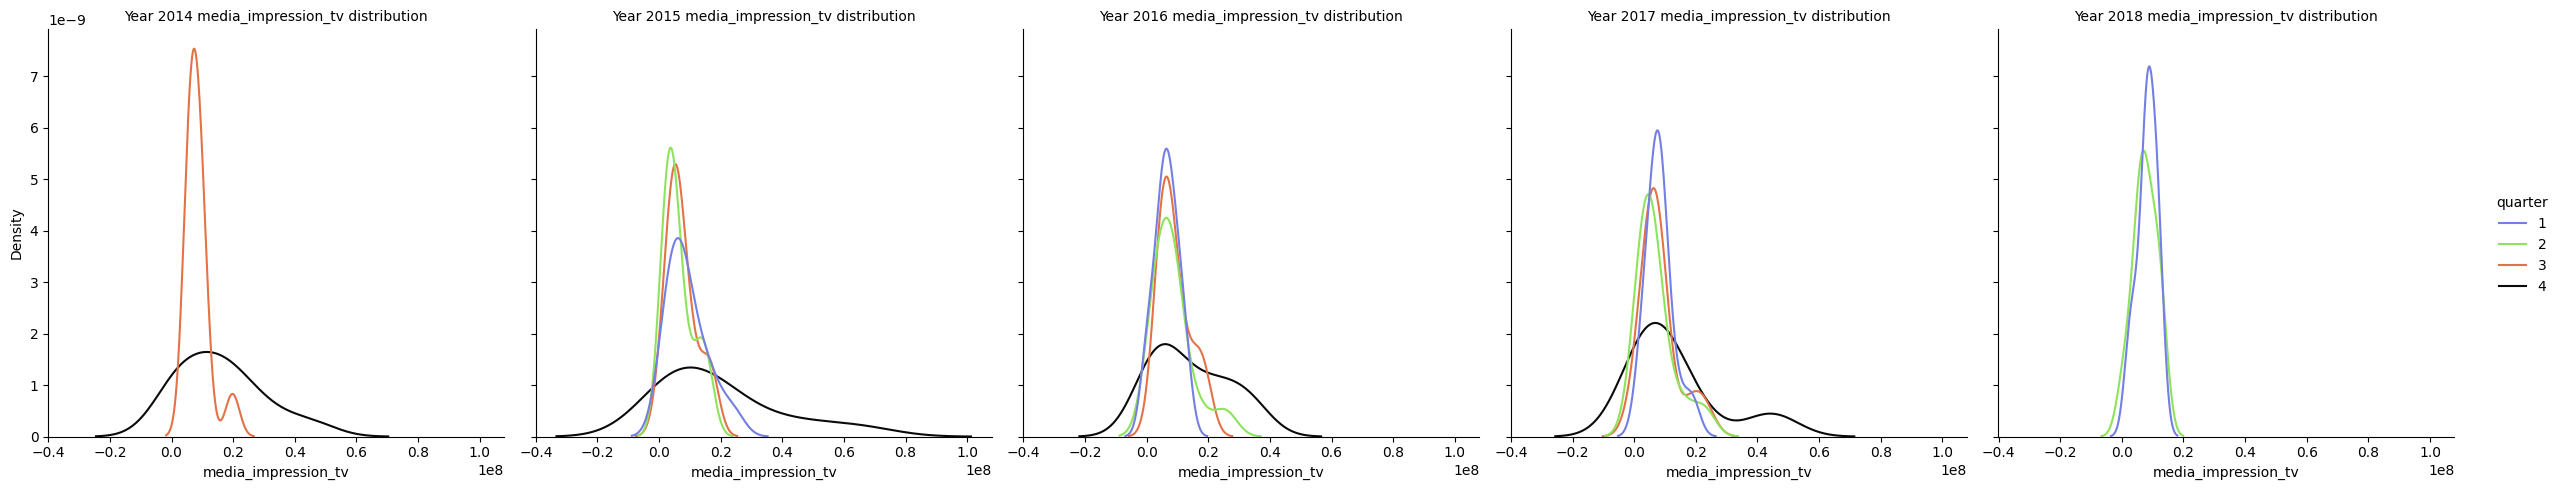

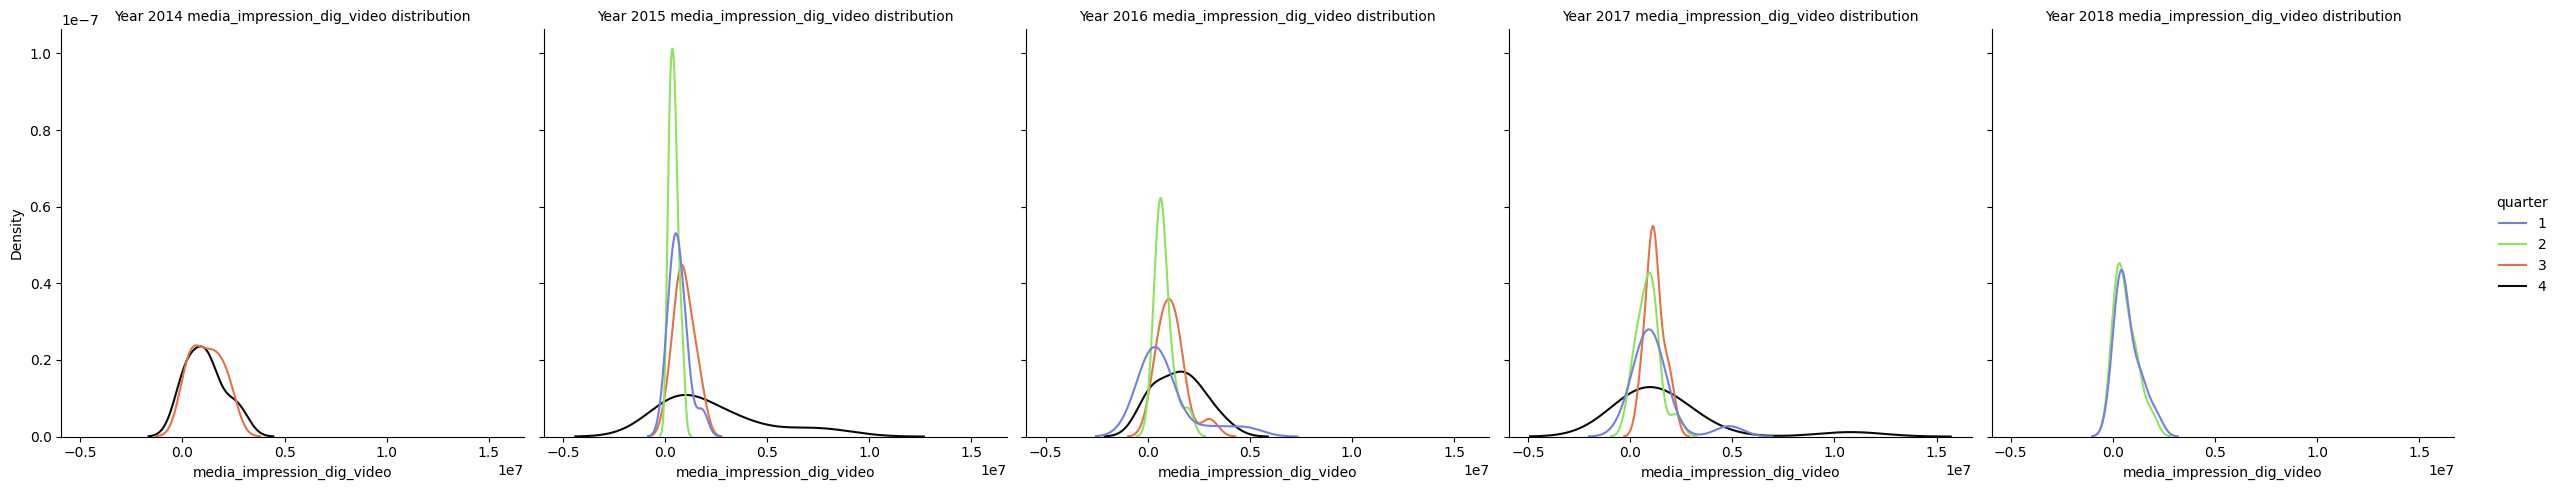

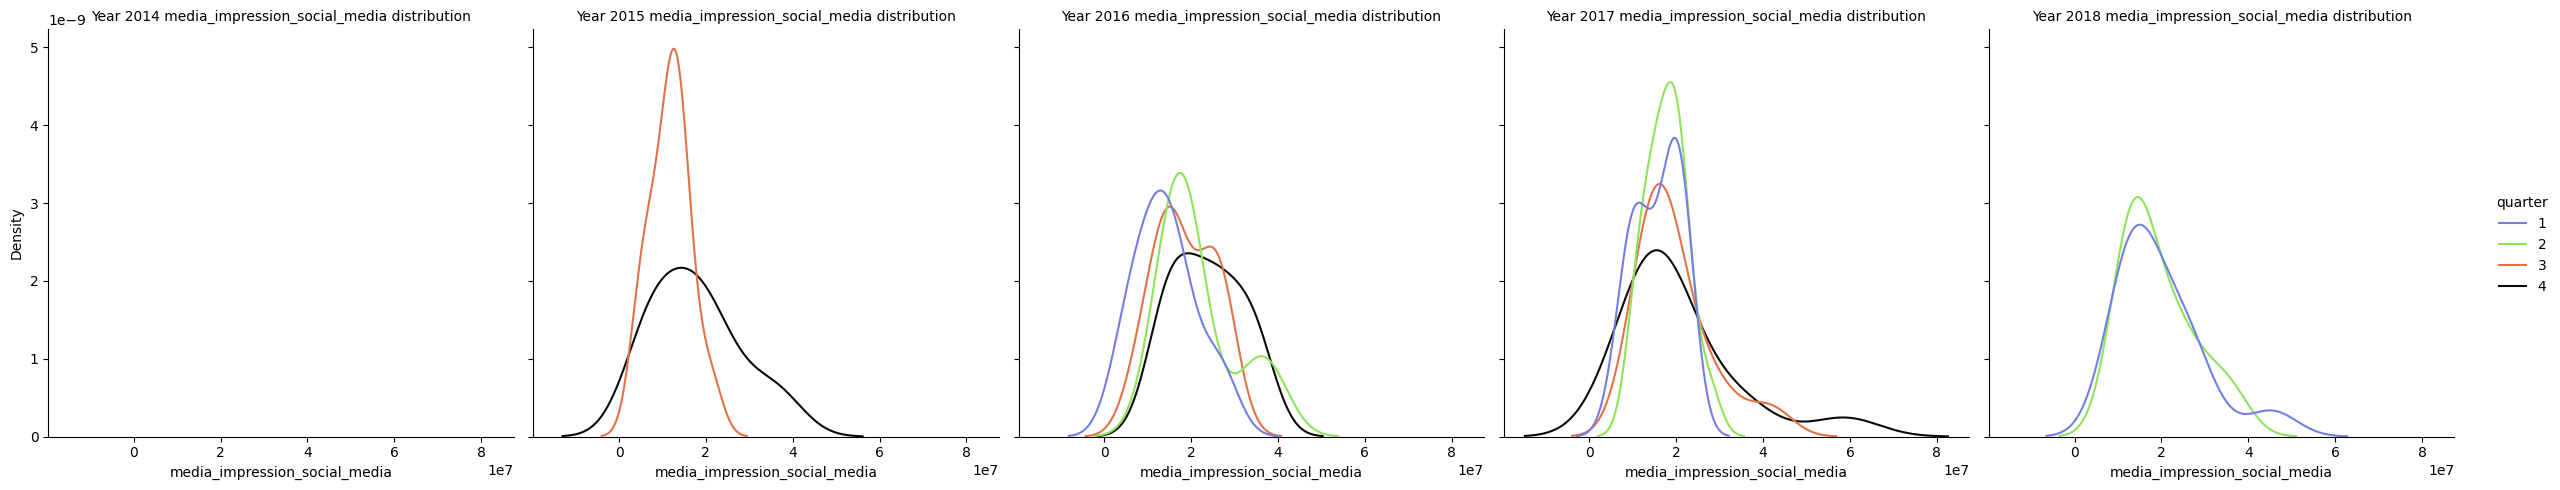

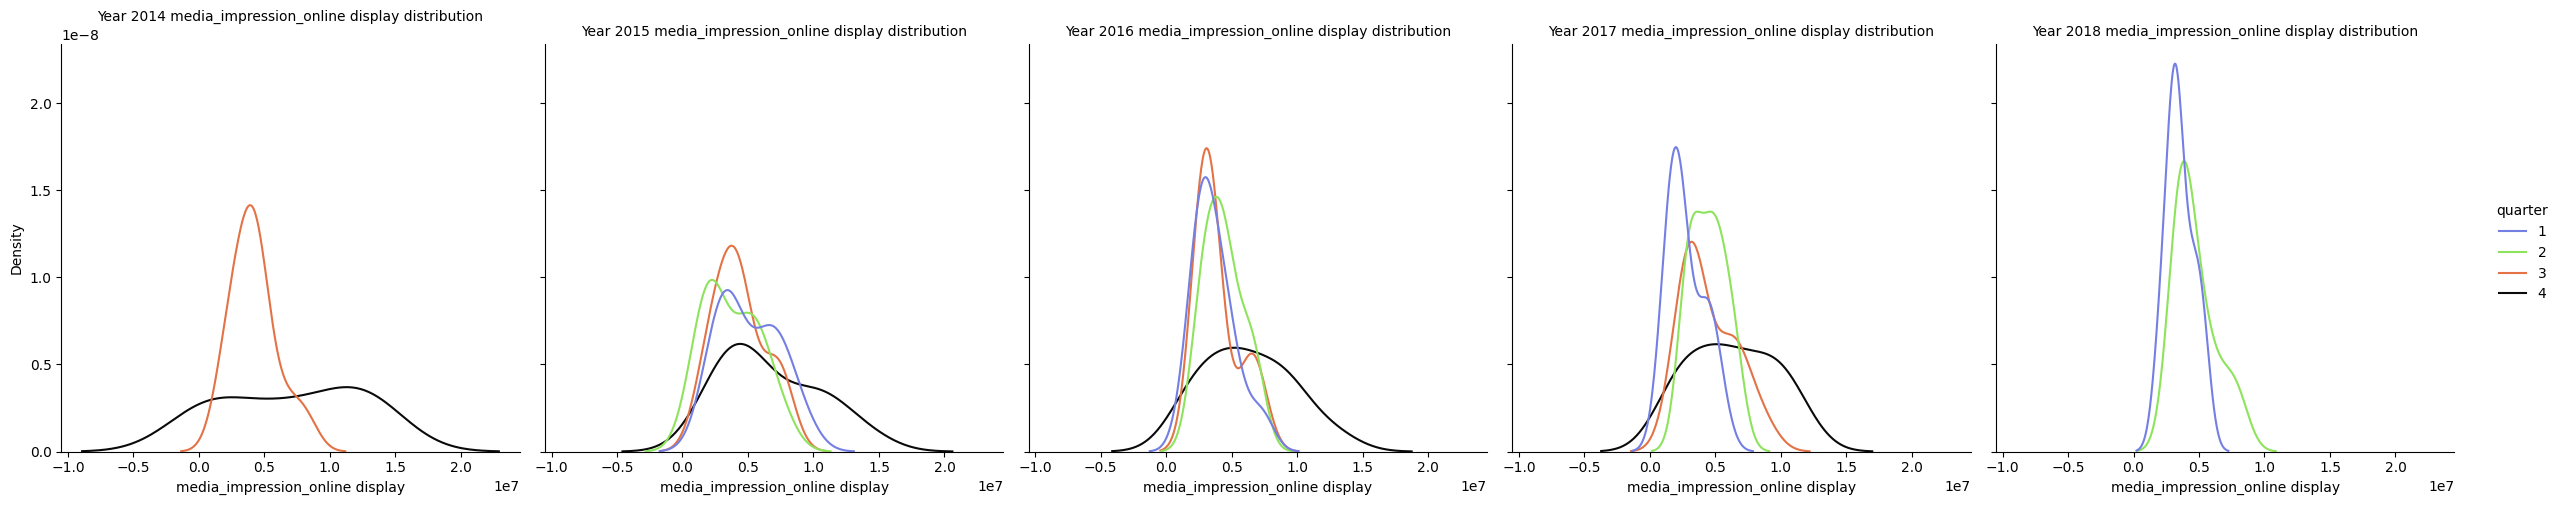

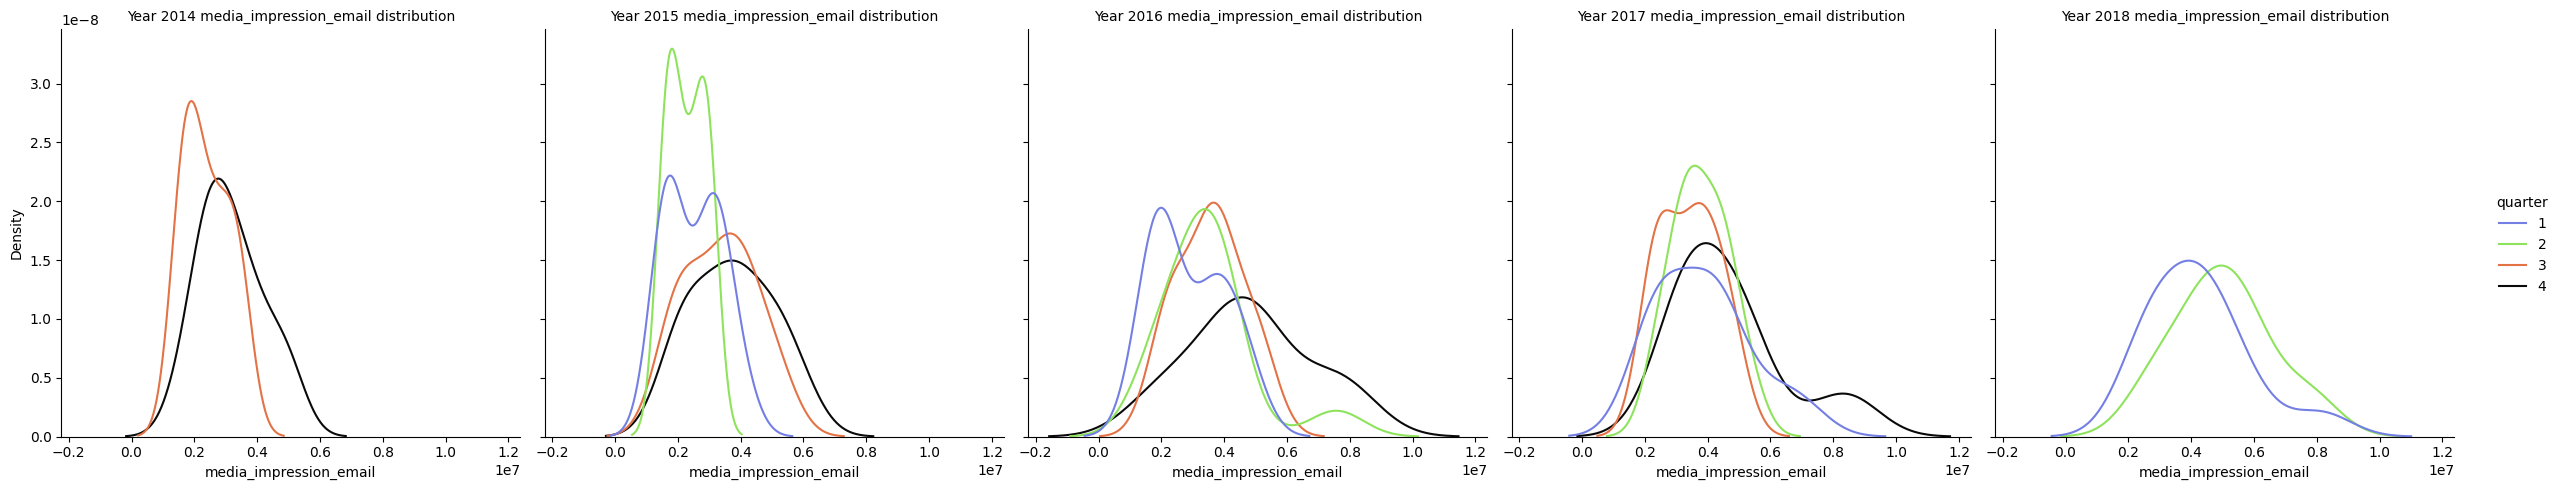

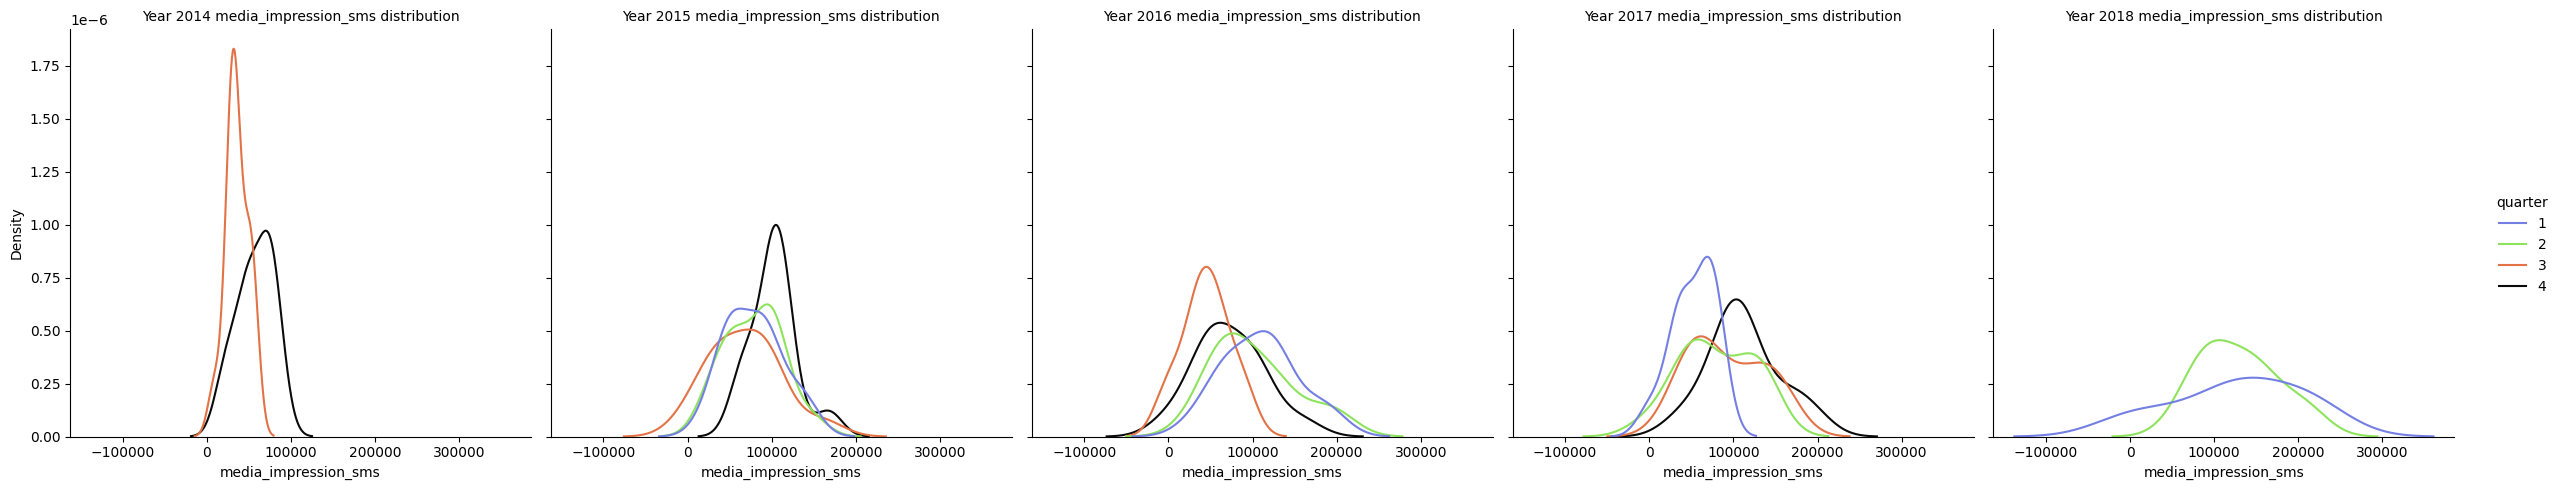

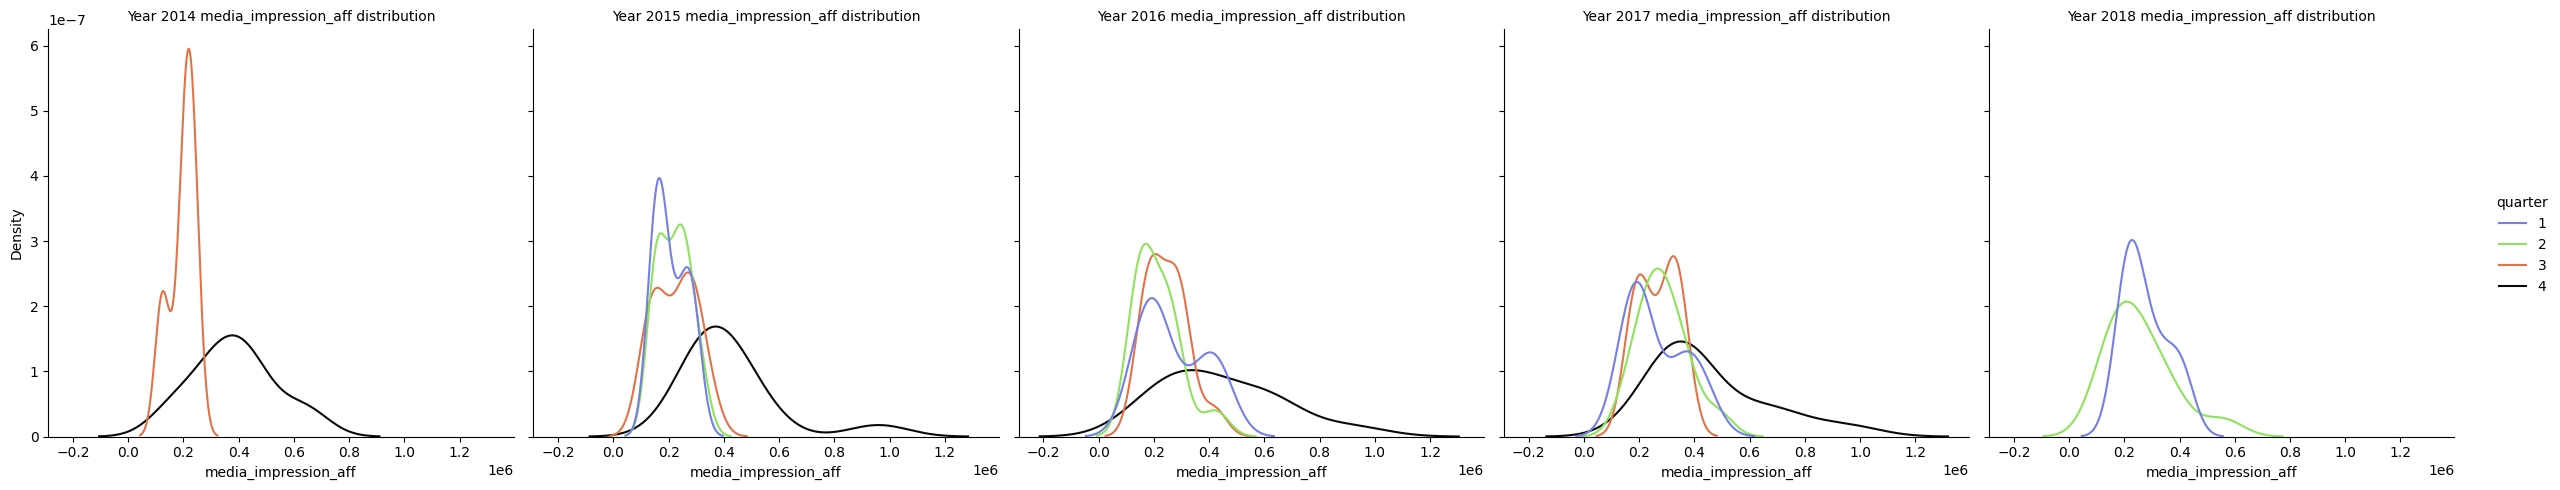

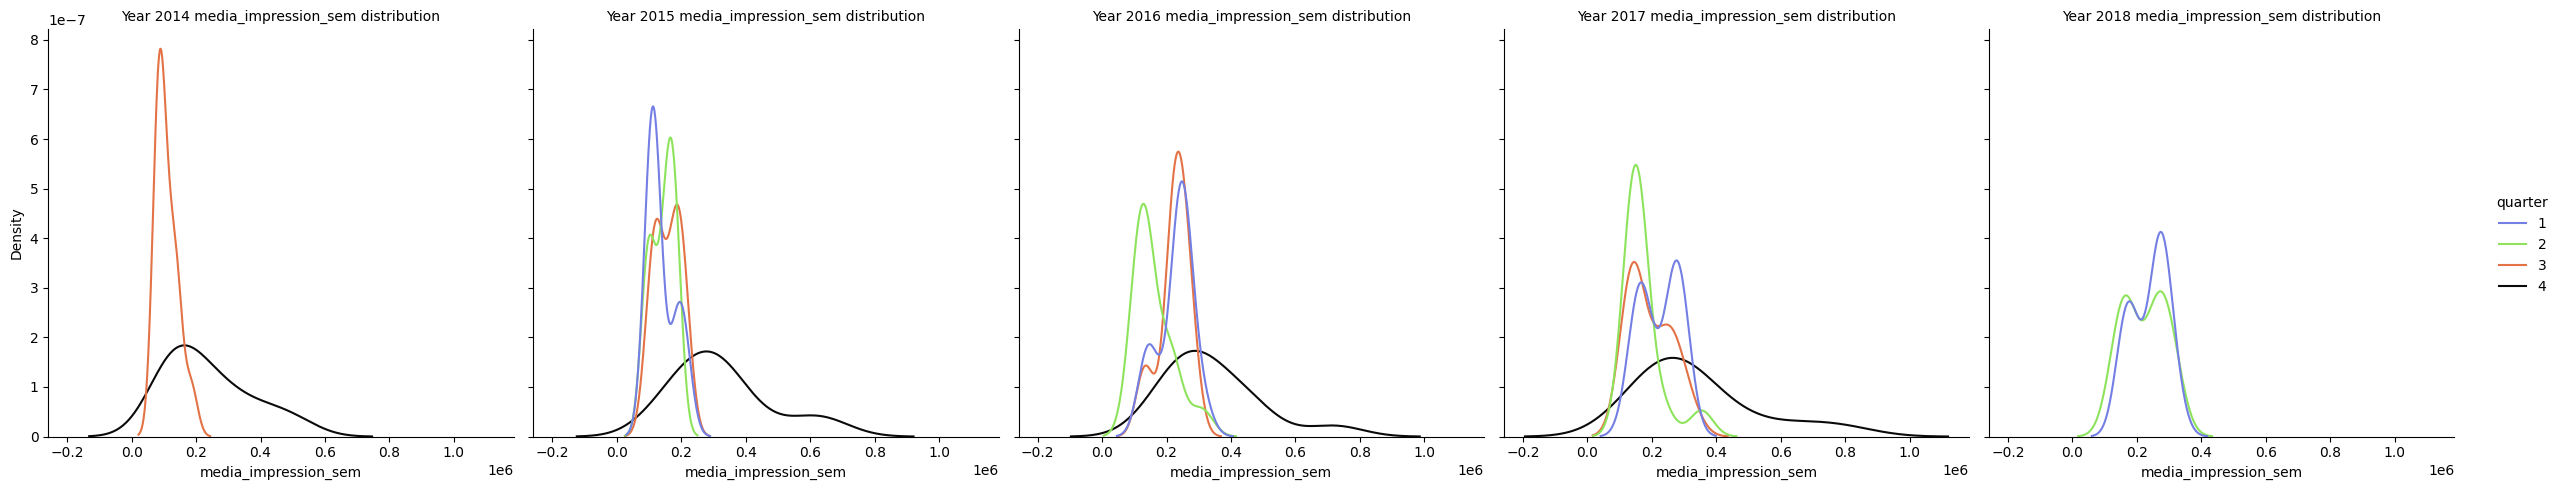

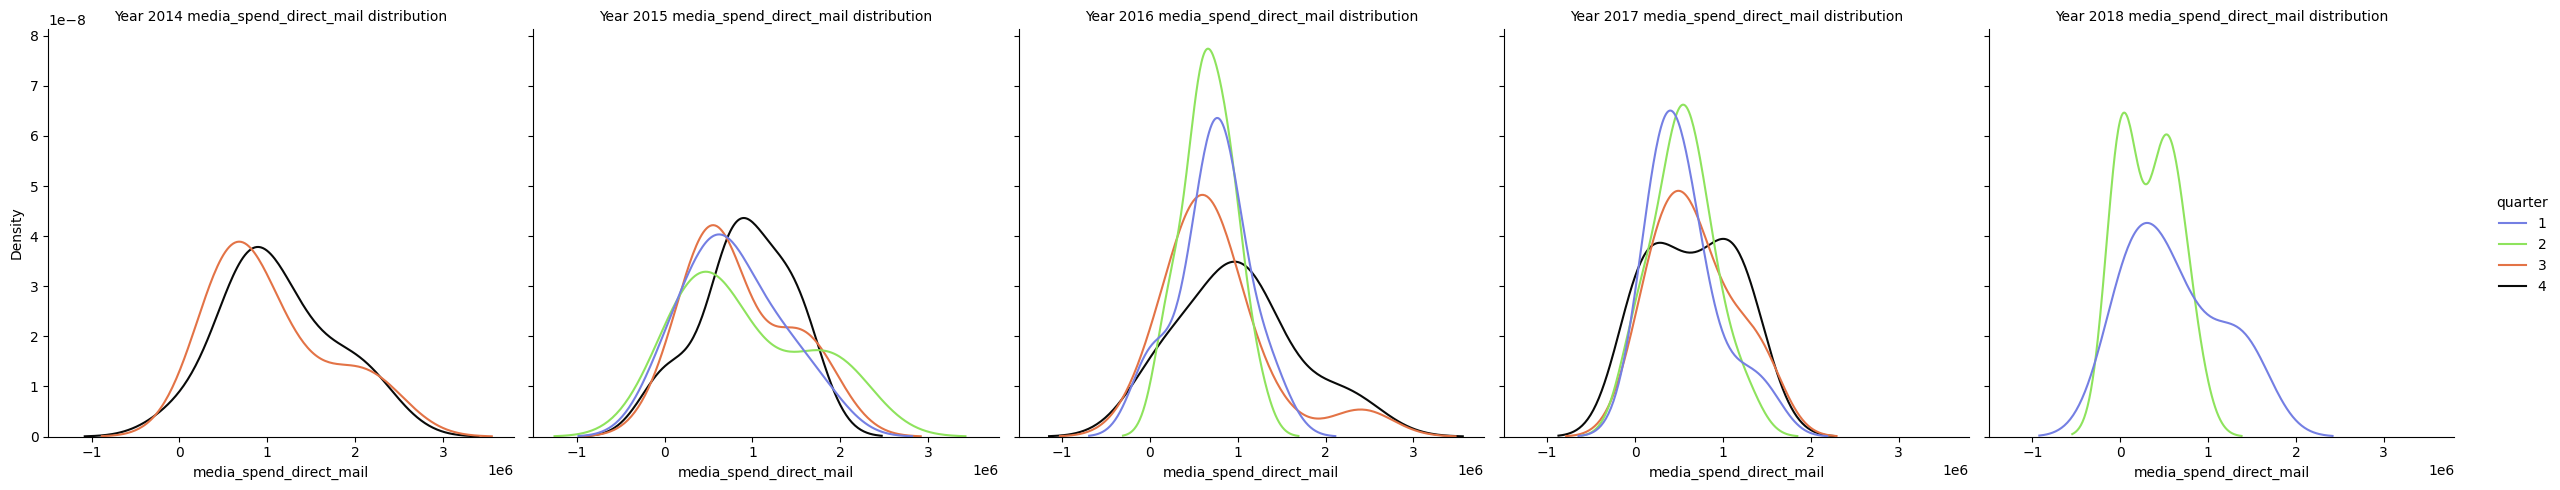

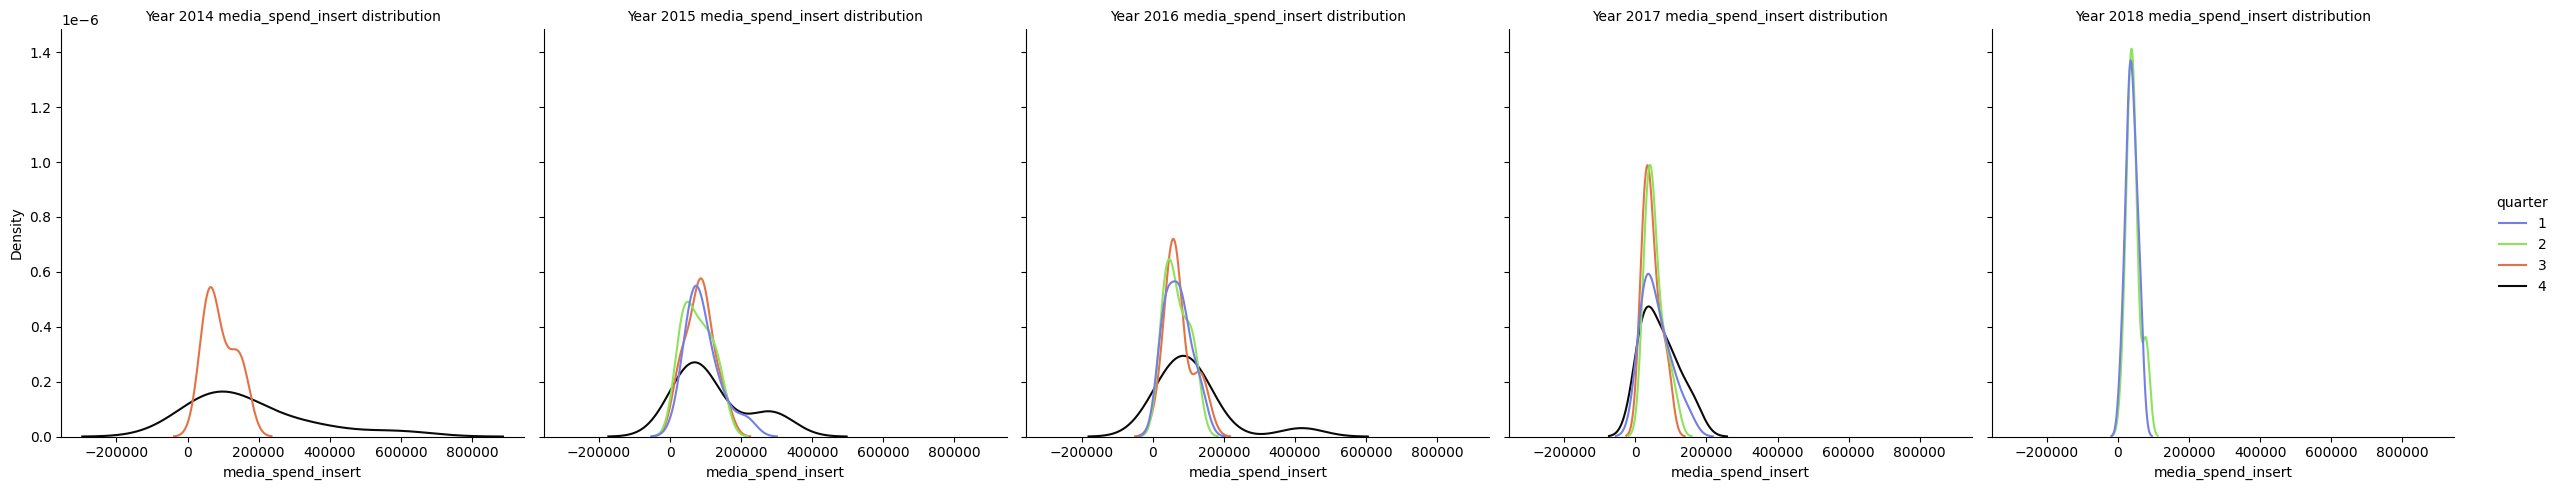

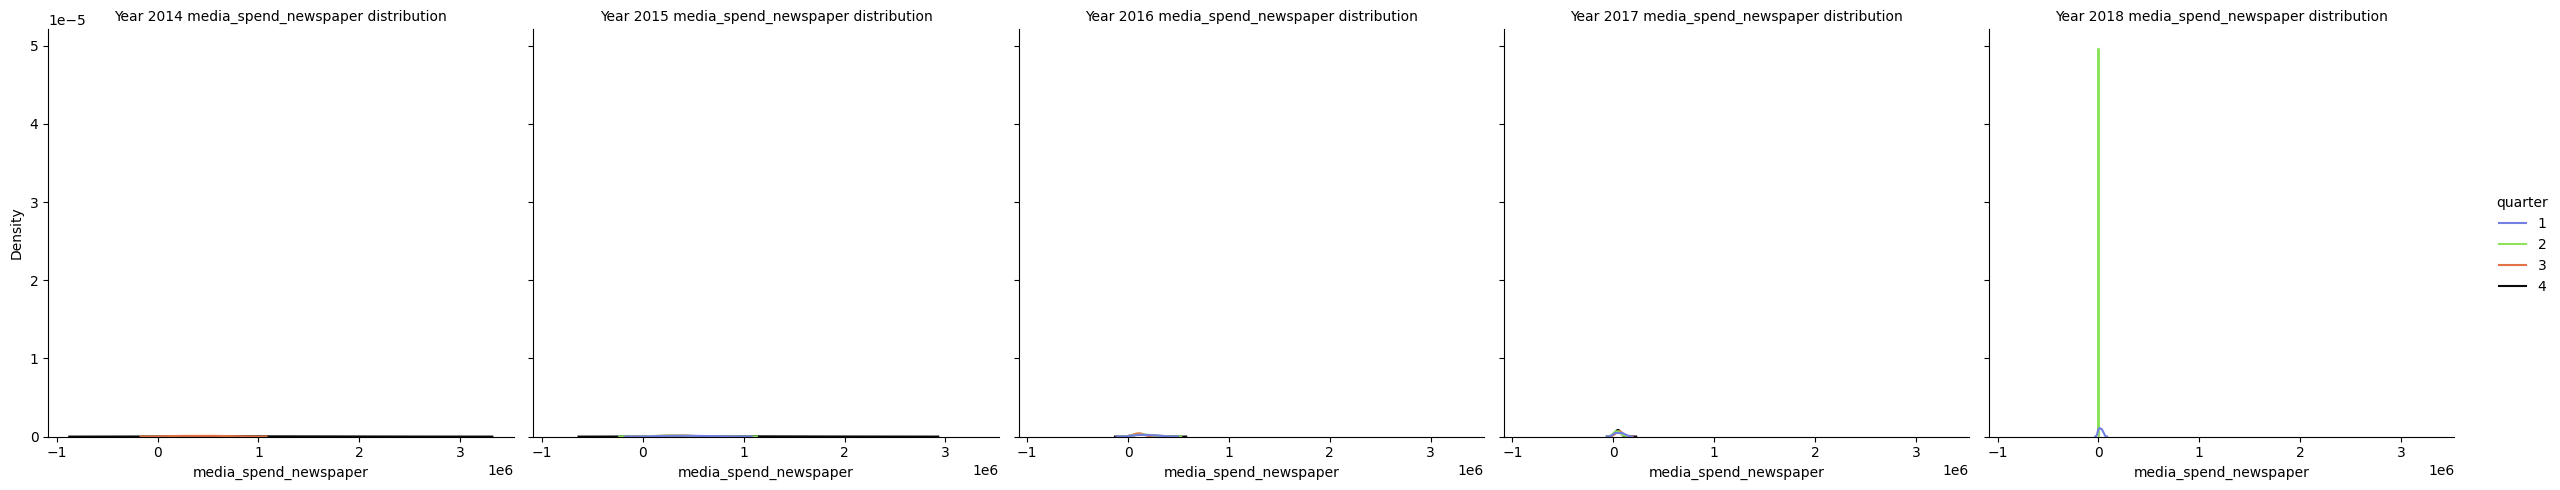

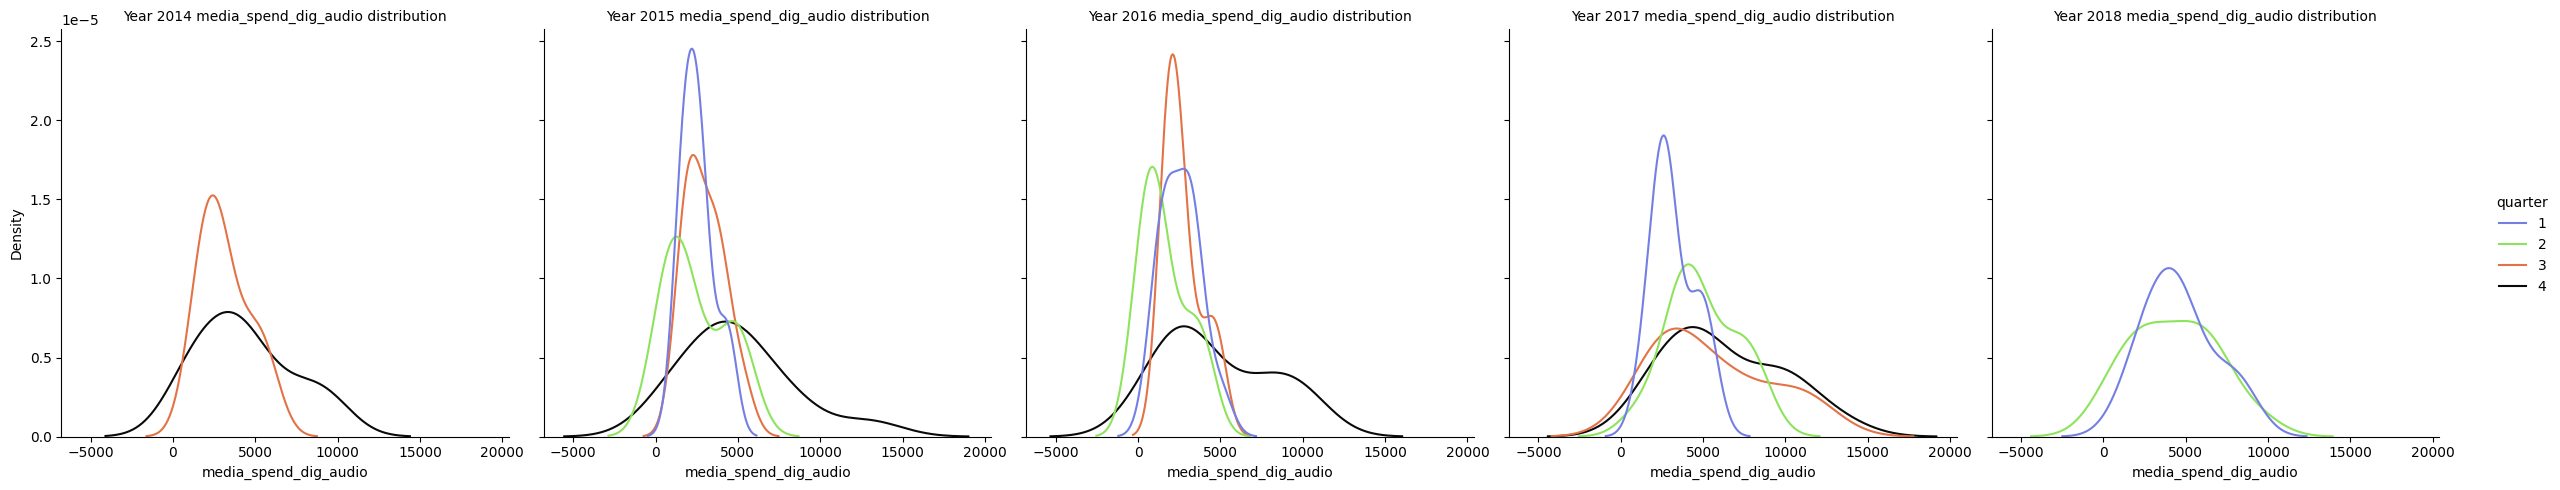

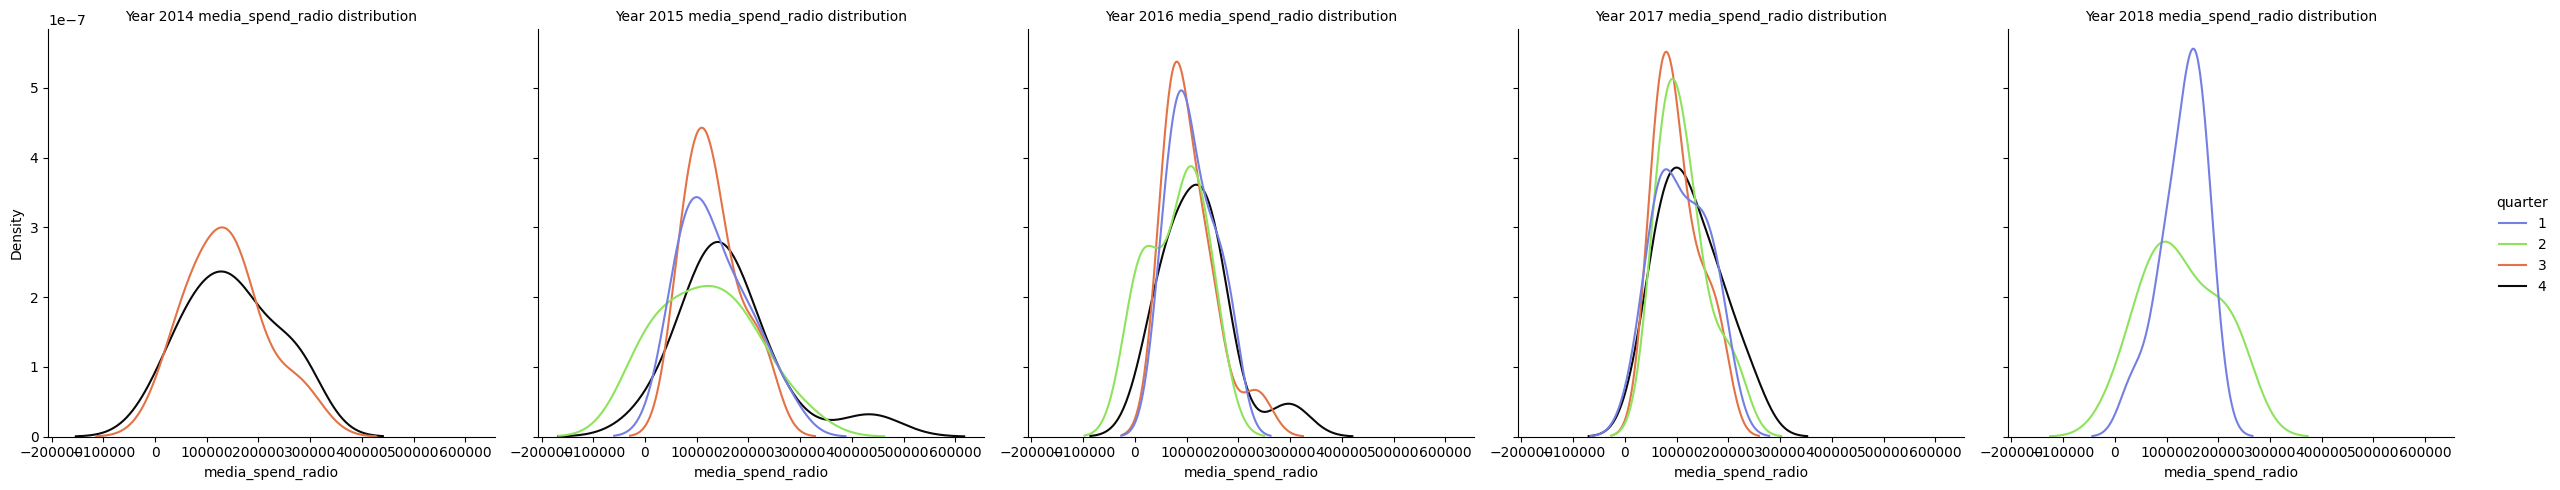

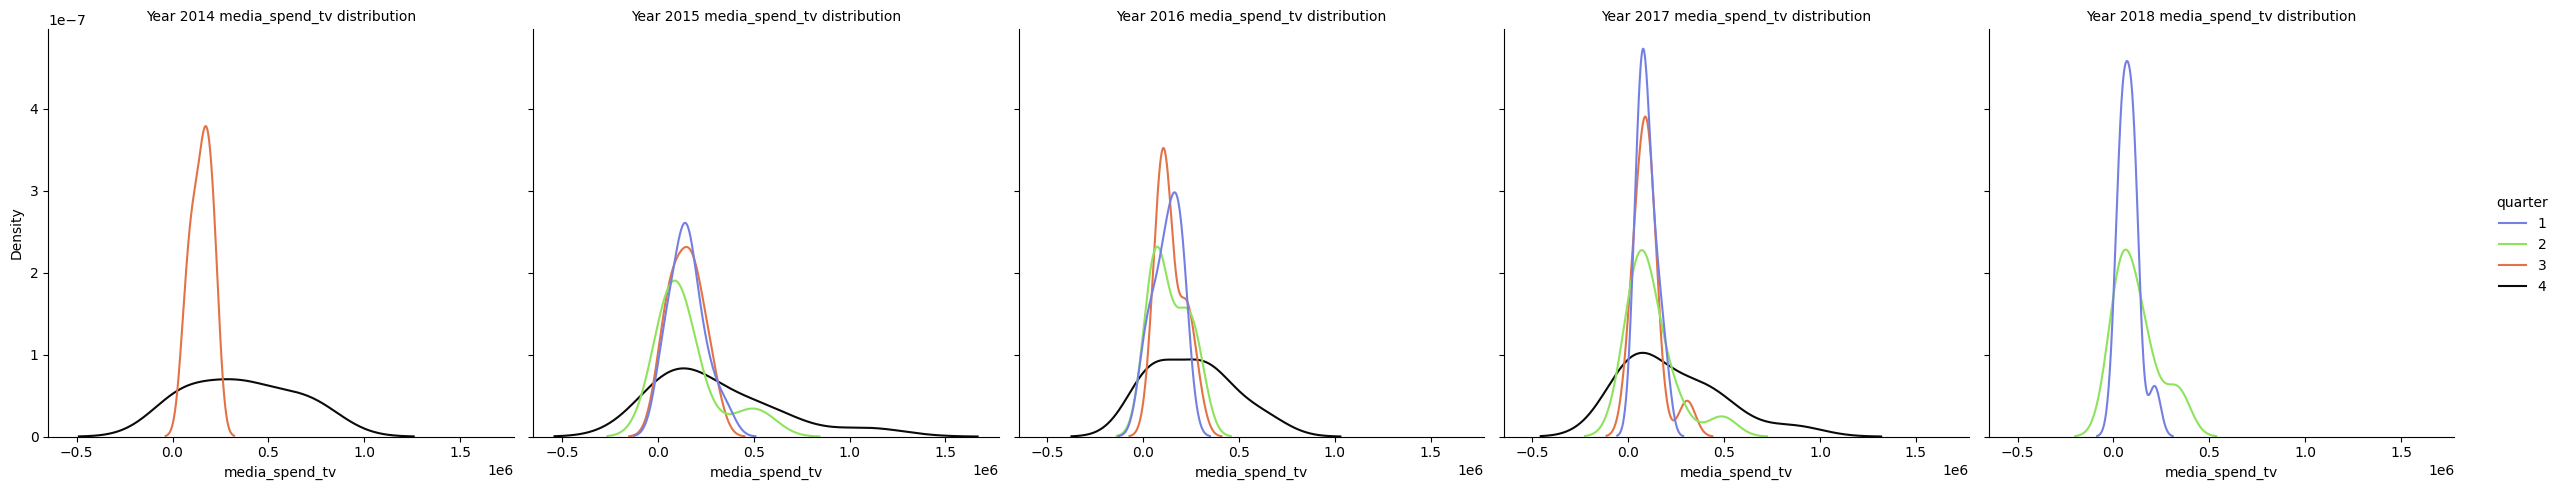

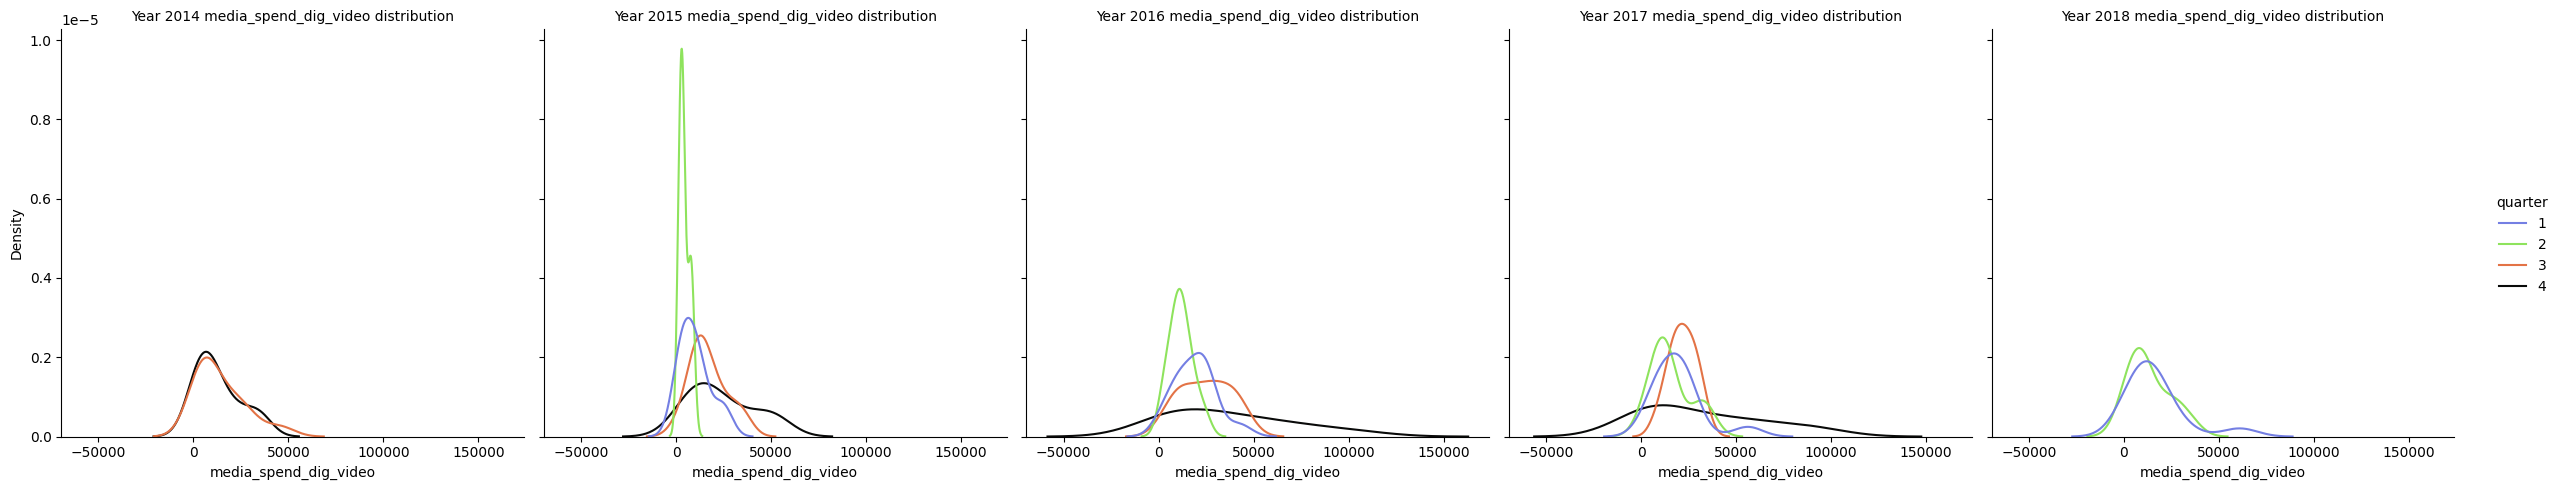

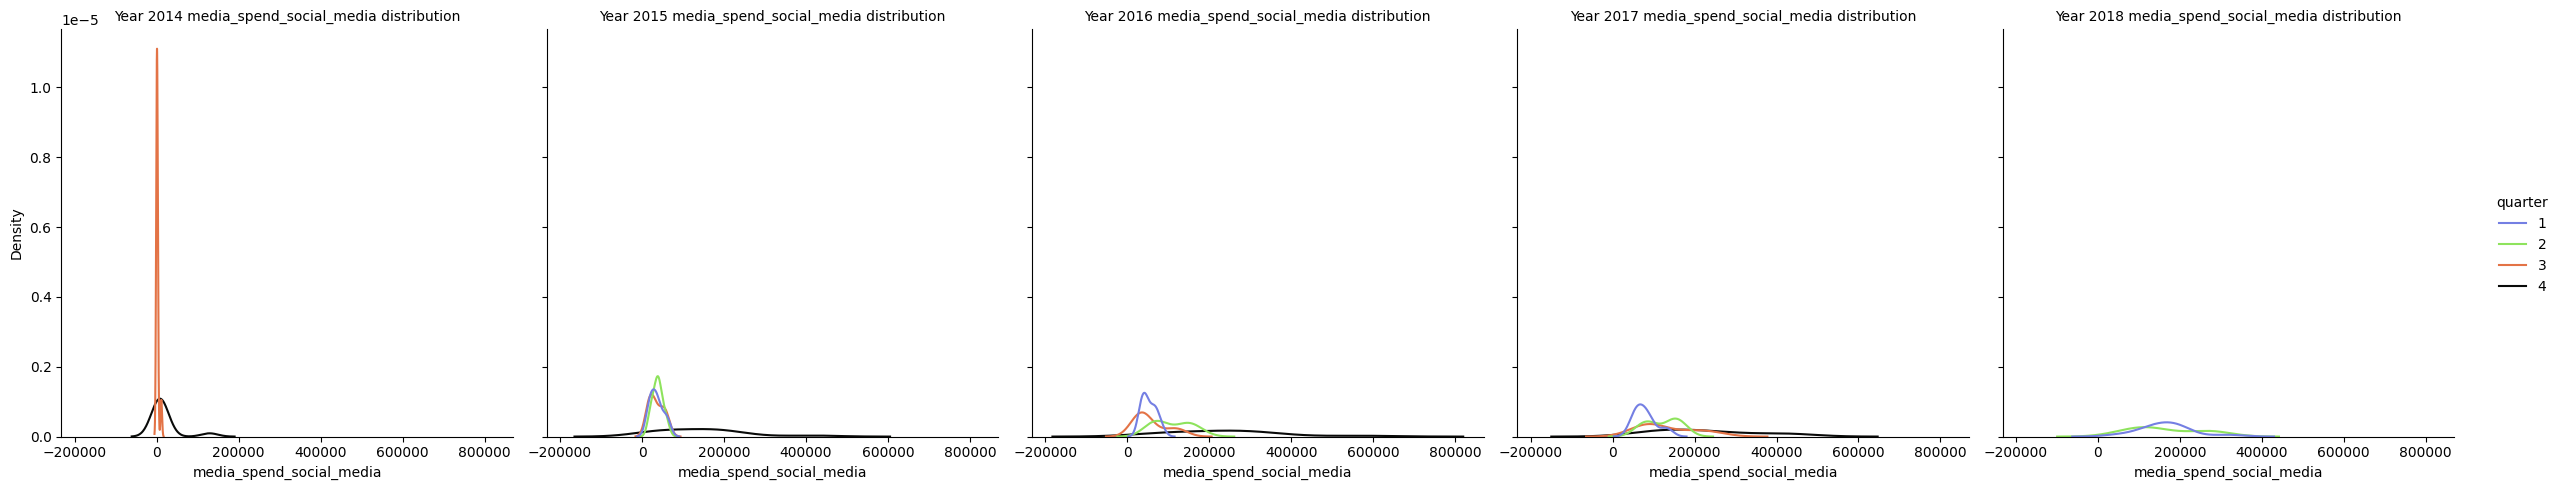

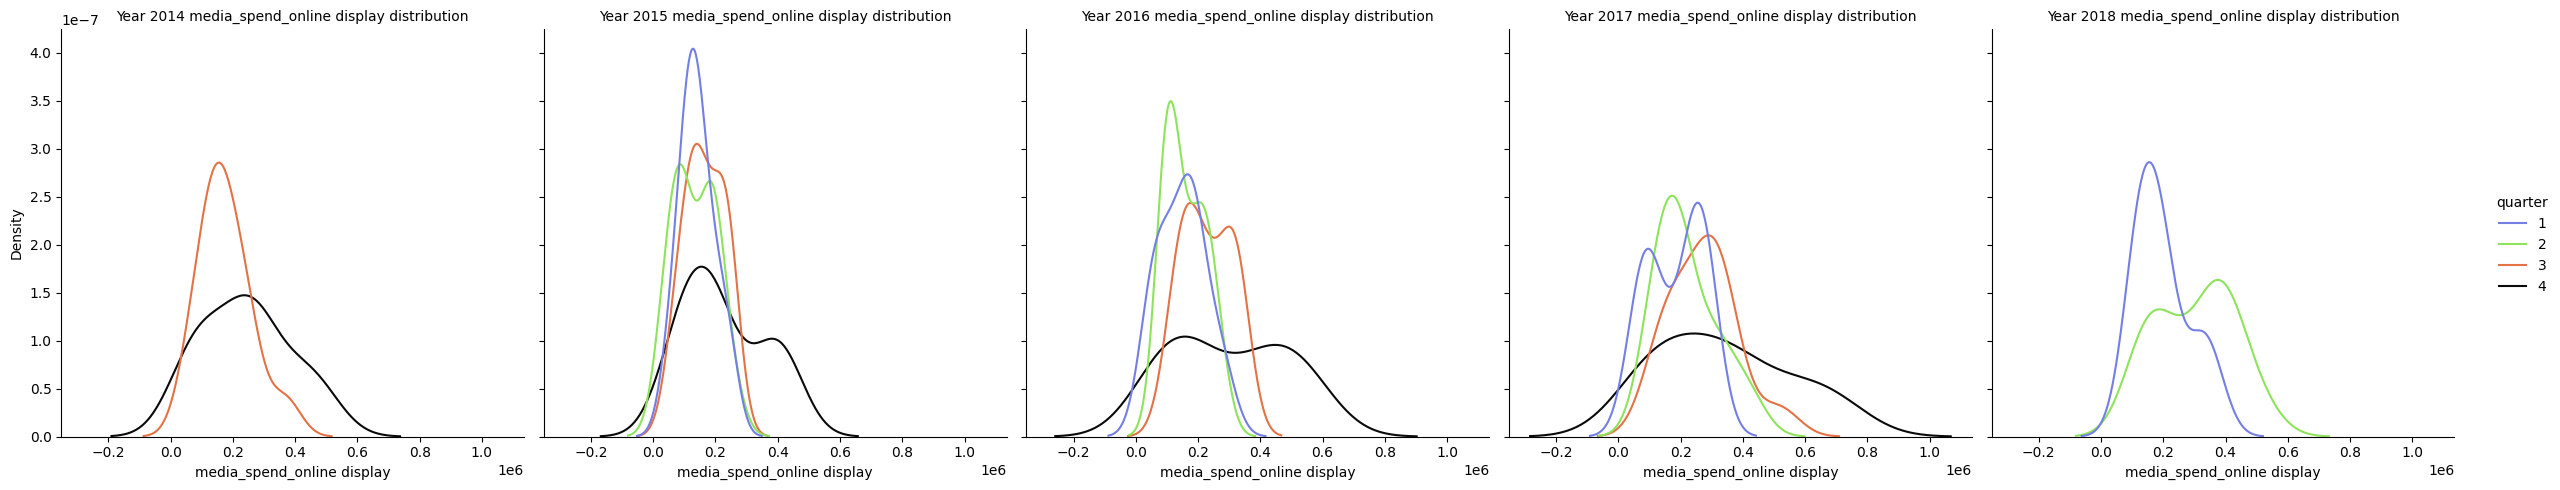

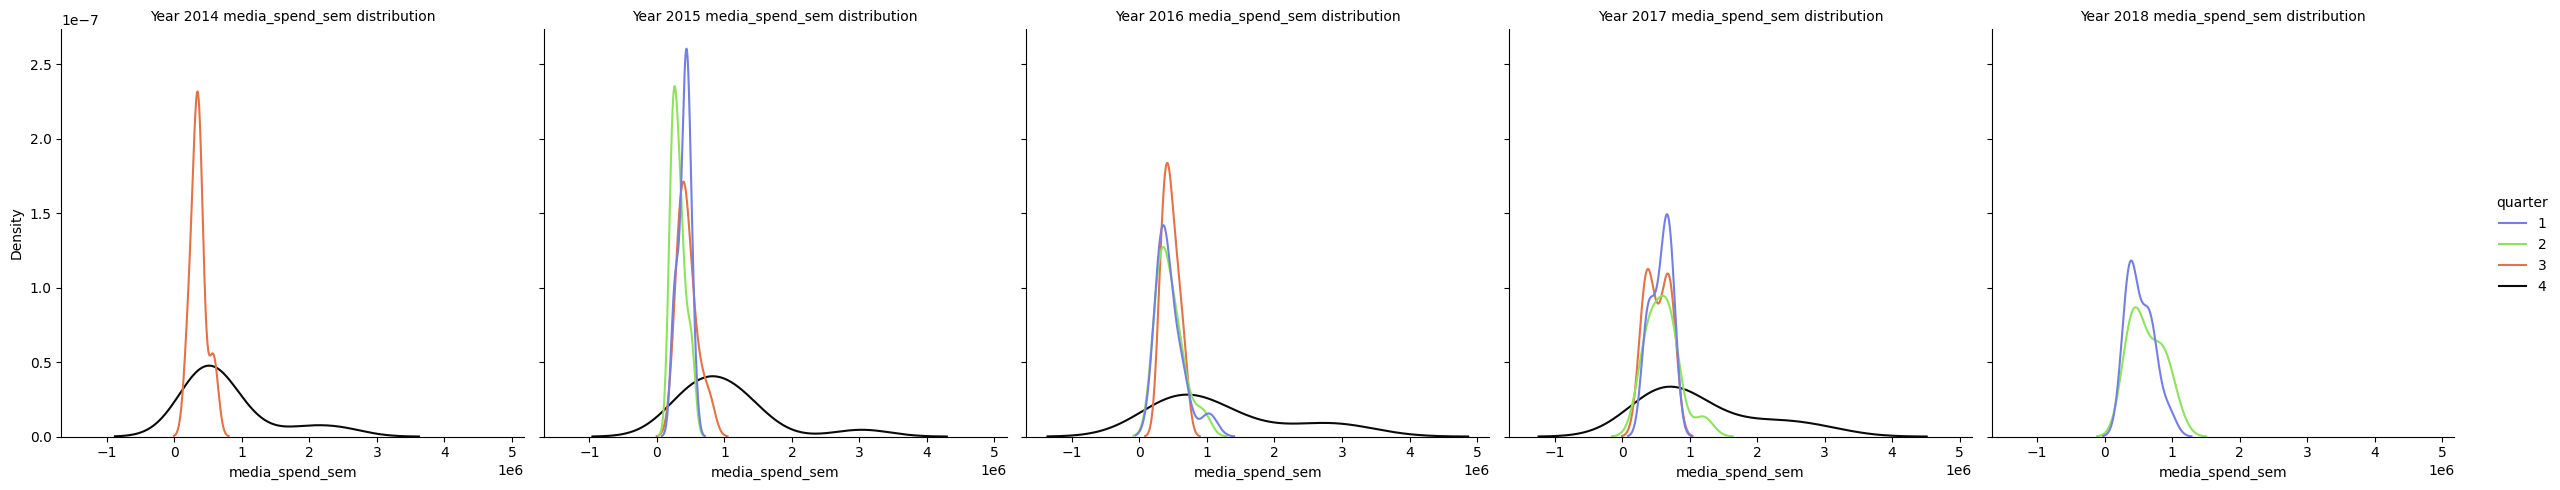

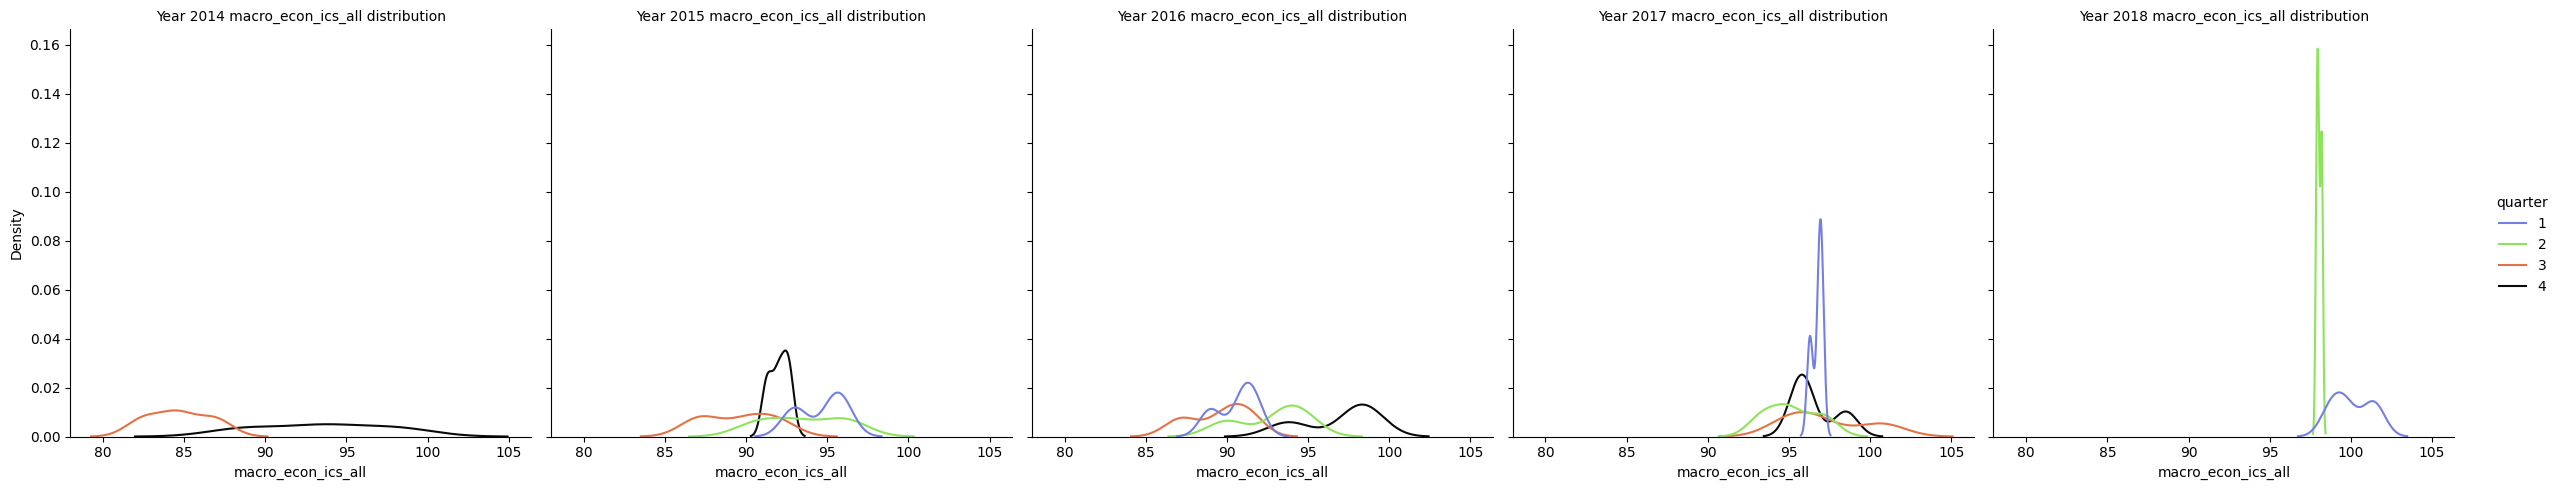

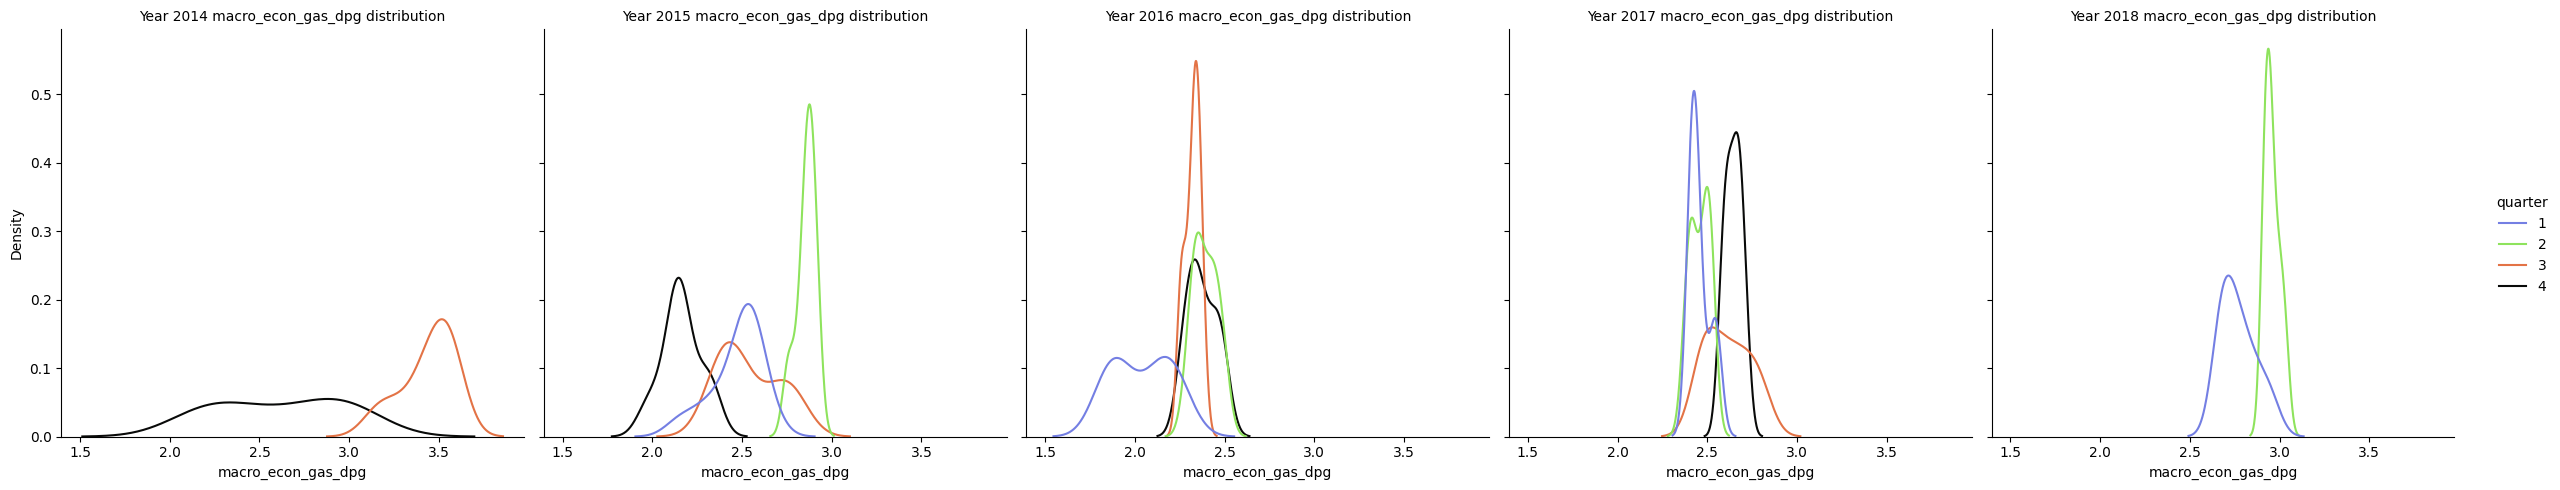

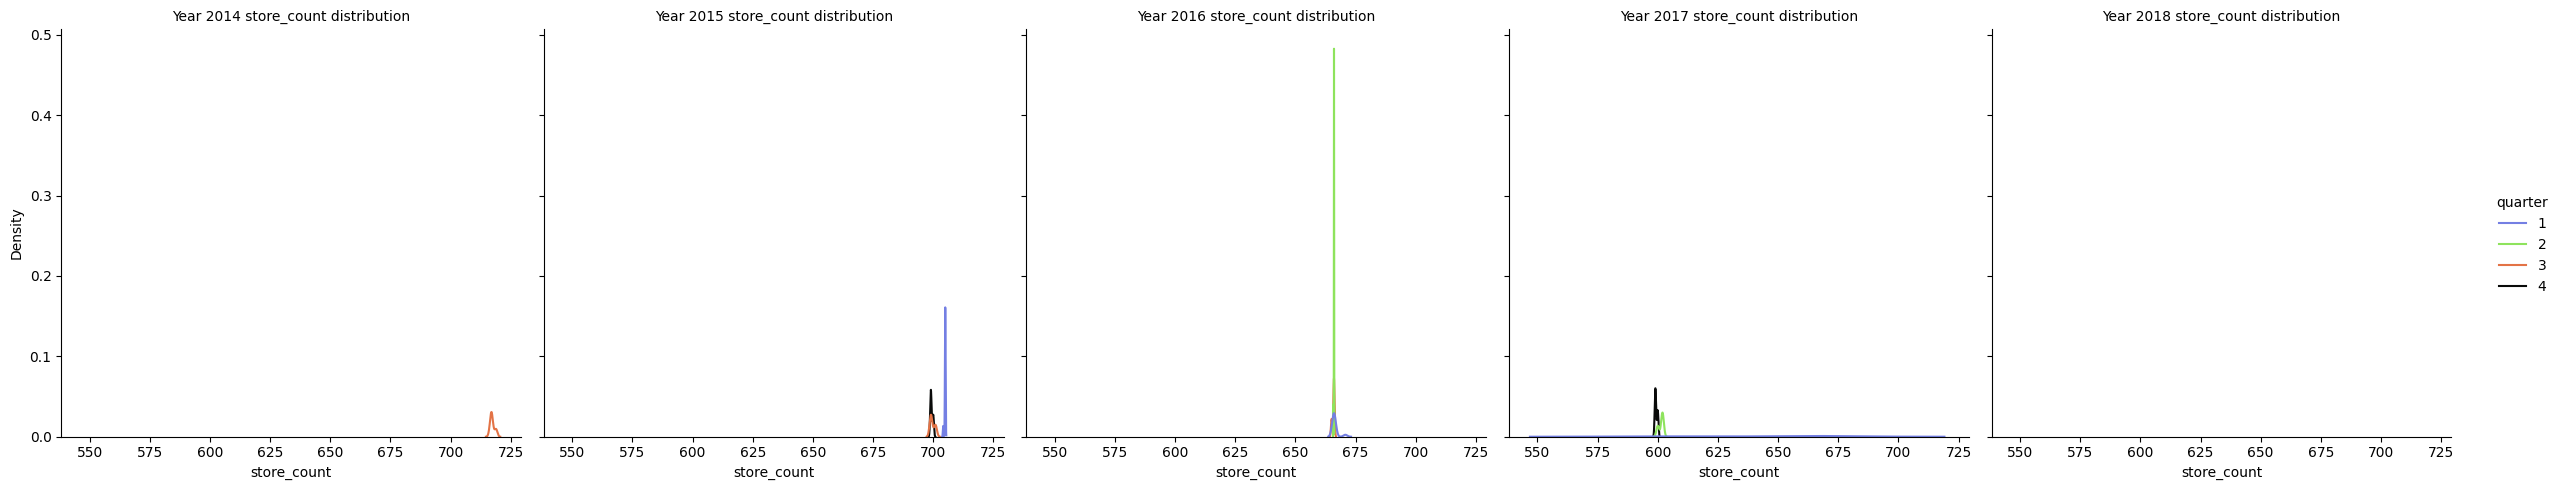

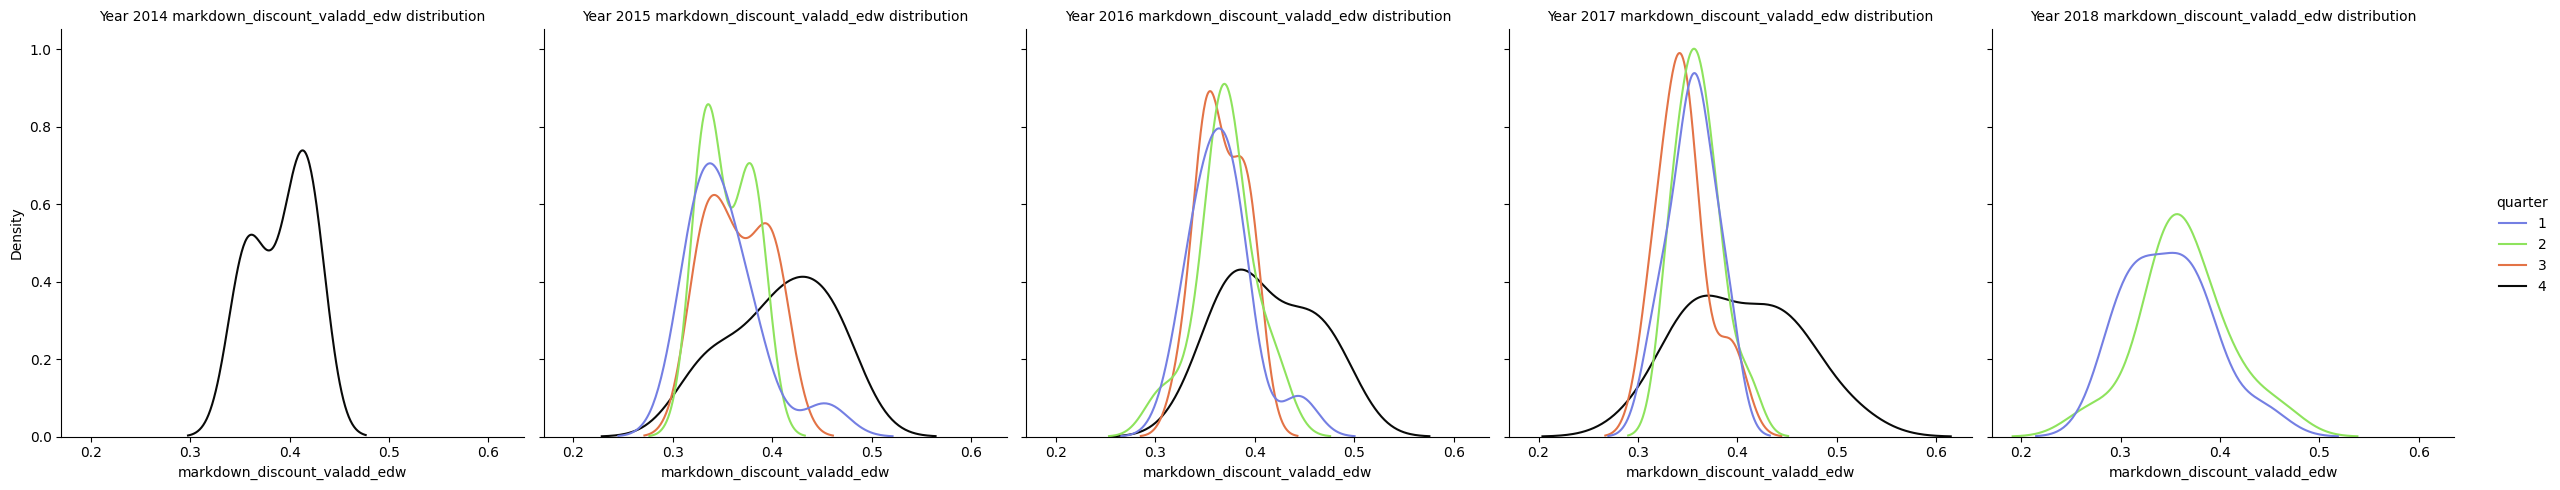

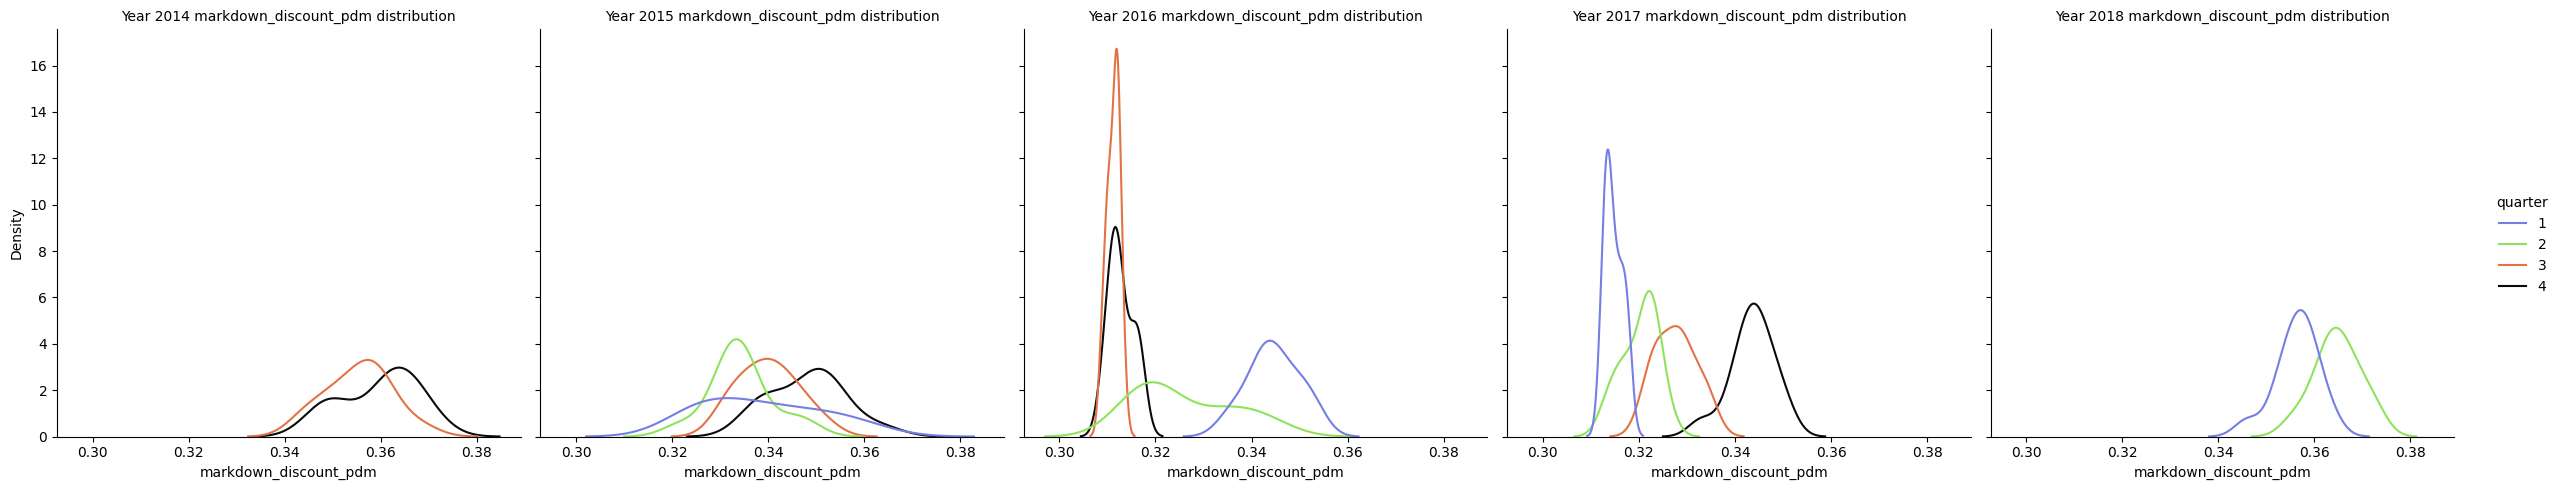

In [9]:
"""
Distribution of continuous features

"""
colors = ['#747FE3', '#8EE35D', '#E37346','#090a09']
for col in continuous_column:
    # sns.color_palette("viridis", as_cmap=True)
    ax = sns.displot(data=mmm_df3, x=col, hue="quarter",col="year", kind="kde", palette=colors)
    
    title = col + " distribution"   
    ax.set_titles("Year {col_name} " + title)
    plt.show()

#### Year-Wise Media Spend Analysis

- We observe that Direct Mail, Newspaper and SEM consume most of the media spend budget across all the years.

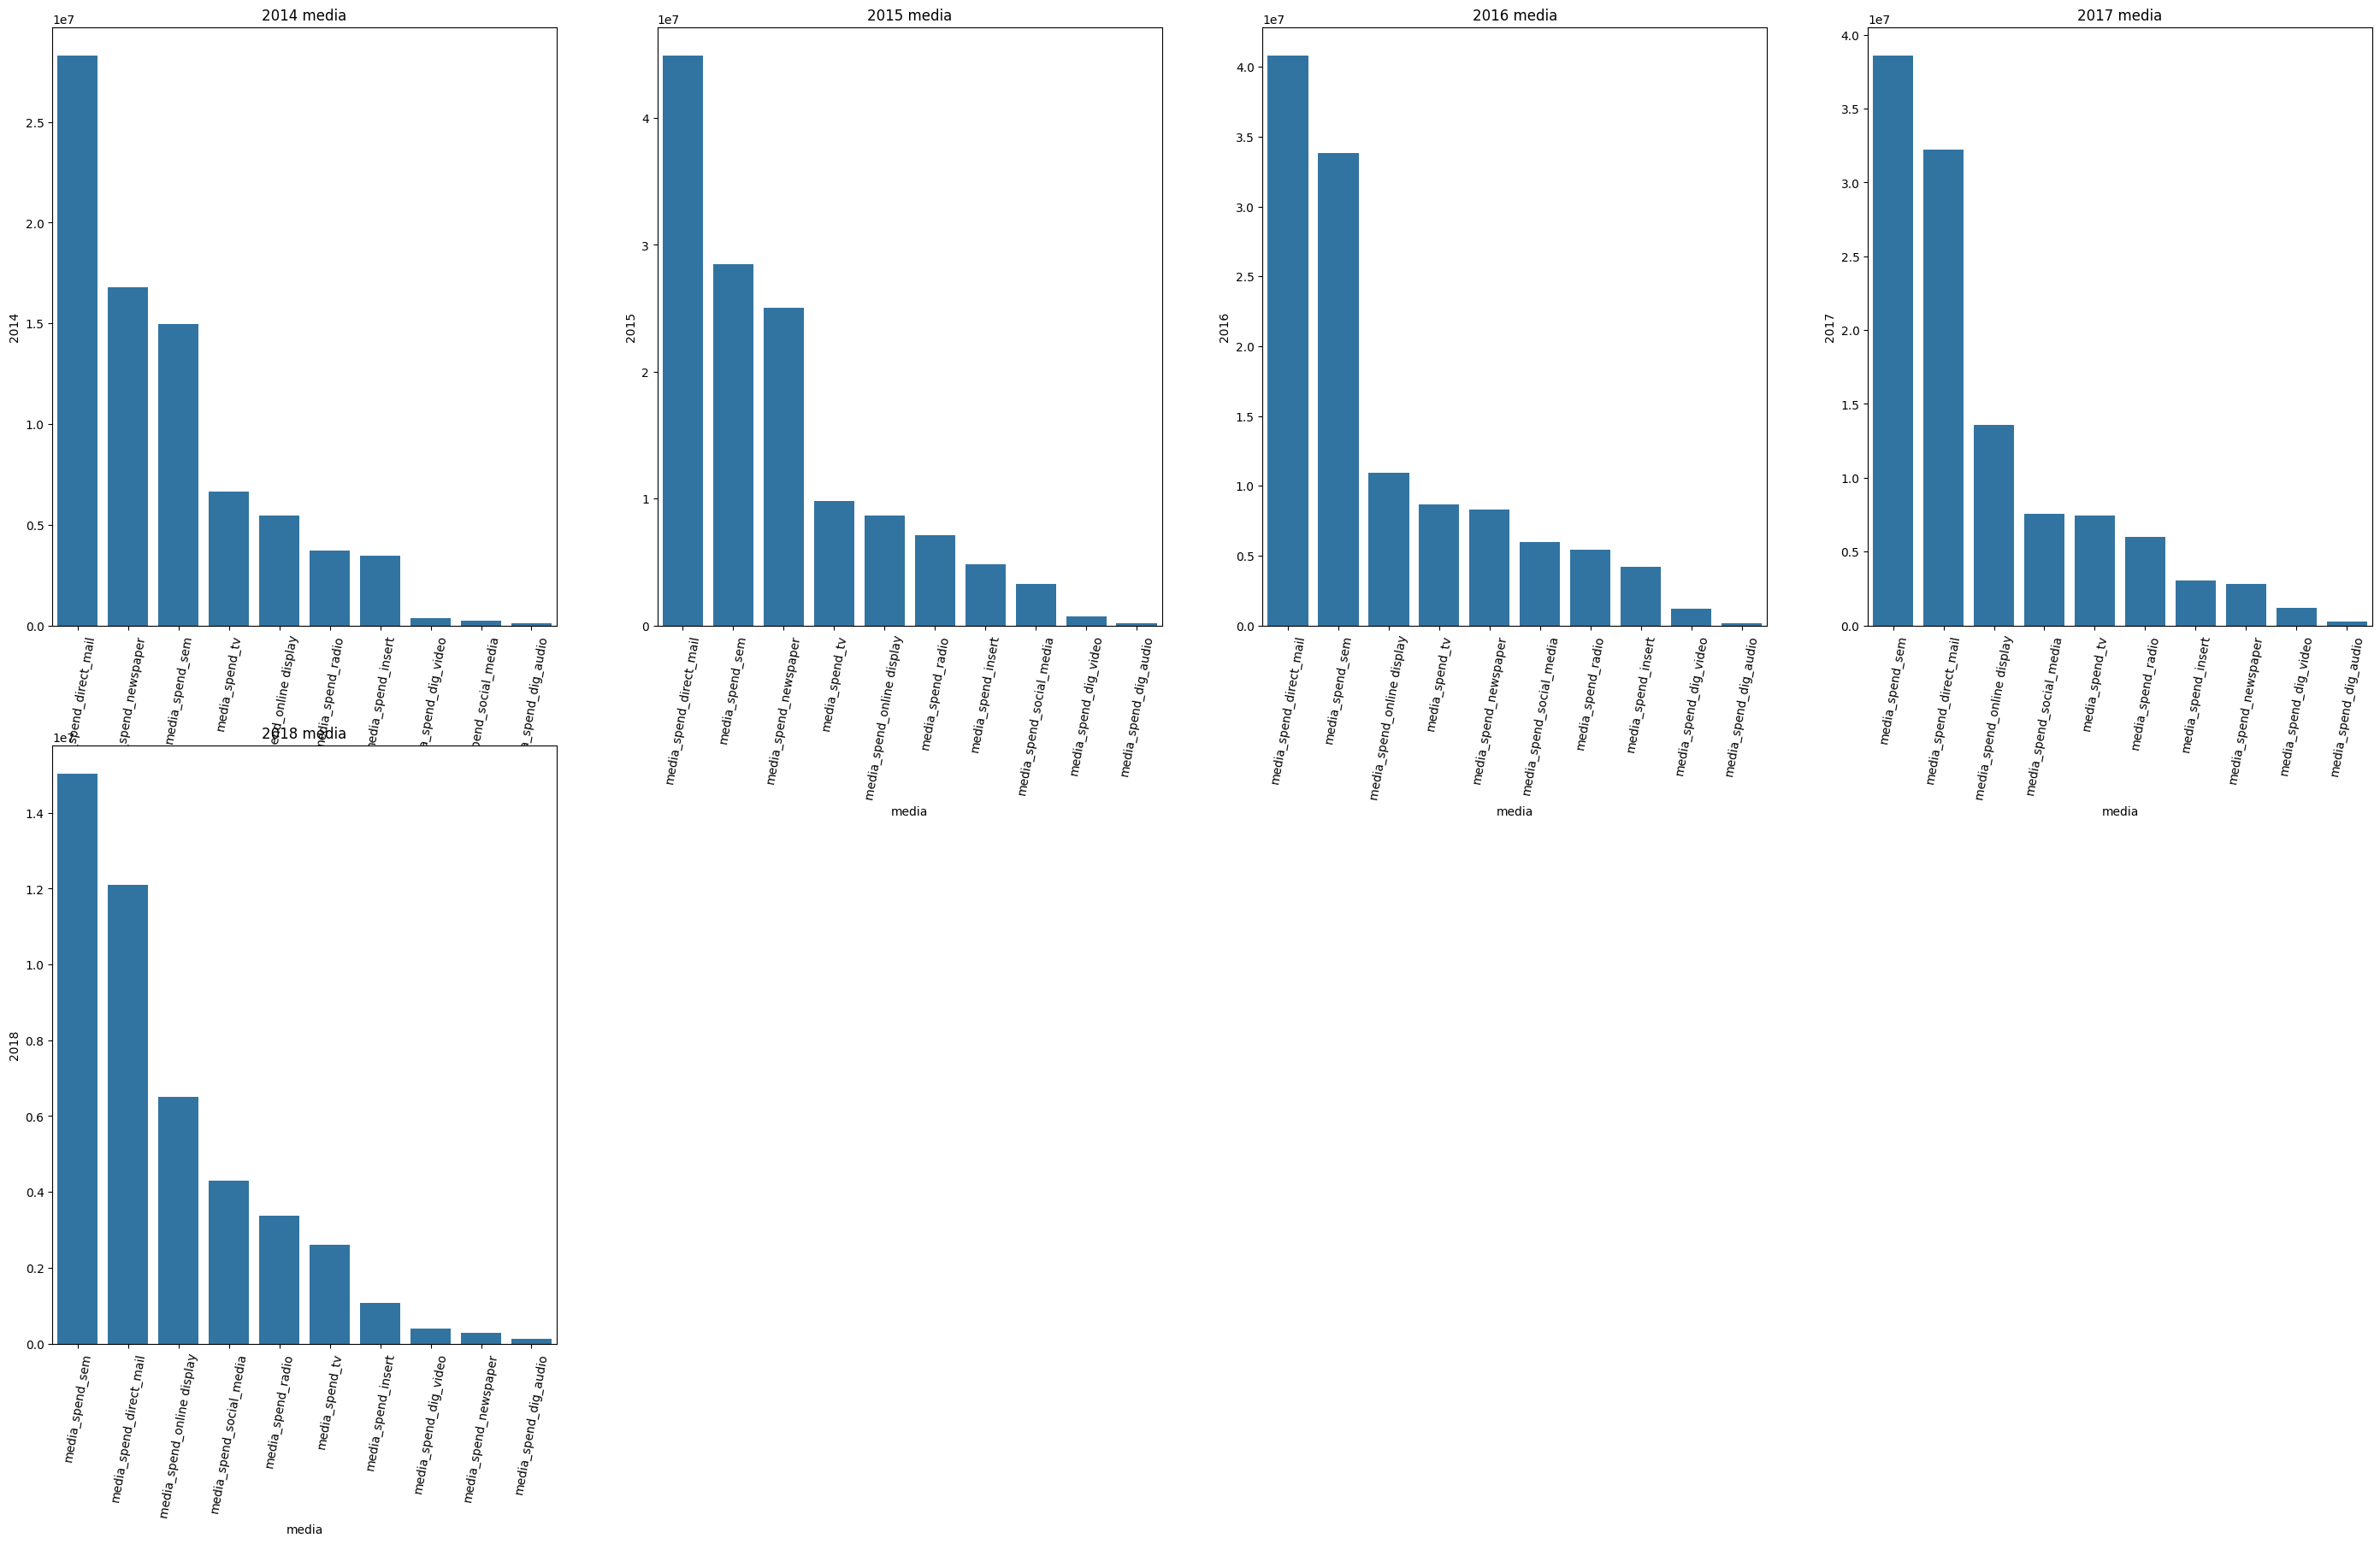

In [10]:
"""

Year-Wise Media Spend Analysis


"""

group_by_cols = continuous_column+target_column

mmm_sales_and_spend_summarised = mmm_df2.groupby(['year'])[group_by_cols].apply(lambda x : x.astype(int).sum()).reset_index()
req_cols = [i for i in mmm_sales_and_spend_summarised.columns if 'impression' not in i and 'macro' not in i and 'markdown' not in i and 'store_count' not in i]
req_cols = [i for i in req_cols if 'sales' not in i]
mmm_sales_and_spend_summarised = mmm_sales_and_spend_summarised[req_cols]

mmm_sales_and_spend_summarised = mmm_sales_and_spend_summarised.transpose()
mmm_sales_and_spend_summarised.columns = [str(i) for i in mmm_sales_and_spend_summarised.iloc[0].tolist()]
mmm_sales_and_spend_summarised = mmm_sales_and_spend_summarised[1:]
mmm_sales_and_spend_summarised = mmm_sales_and_spend_summarised.rename(columns={'year':'media'})

mmm_sales_and_spend_summarised['media']= mmm_sales_and_spend_summarised.index
mmm_sales_and_spend_summarised = mmm_sales_and_spend_summarised.reset_index(drop=True)
# mmm_sales_and_spend_summarised

plt.figure(figsize=(35,20))
for col in enumerate(mmm_sales_and_spend_summarised.columns):
    if col[1] != 'media':
        plt.subplot(2,4,col[0]+1)
        ax = sns.barplot(data = mmm_sales_and_spend_summarised, x = 'media', y = col[1],order=mmm_sales_and_spend_summarised.sort_values(col[1],ascending=False).media)
        ax.set_title(f"{col[1]} media")
        plt.xticks(rotation = 80)



### Target and Continuous Feature Comparison - Over Time

- We tracked Media Spend/Impressions vs Sales across the weeks. 

- We observe that in many cases, spikes in media spend/impressions leads to increase in sales - there does exist a lag between spend and sales in many cases (sales occur a few weeks after ad-spend).

- The Ad-Stock effect observed will be analysed in-depth in future analysis.


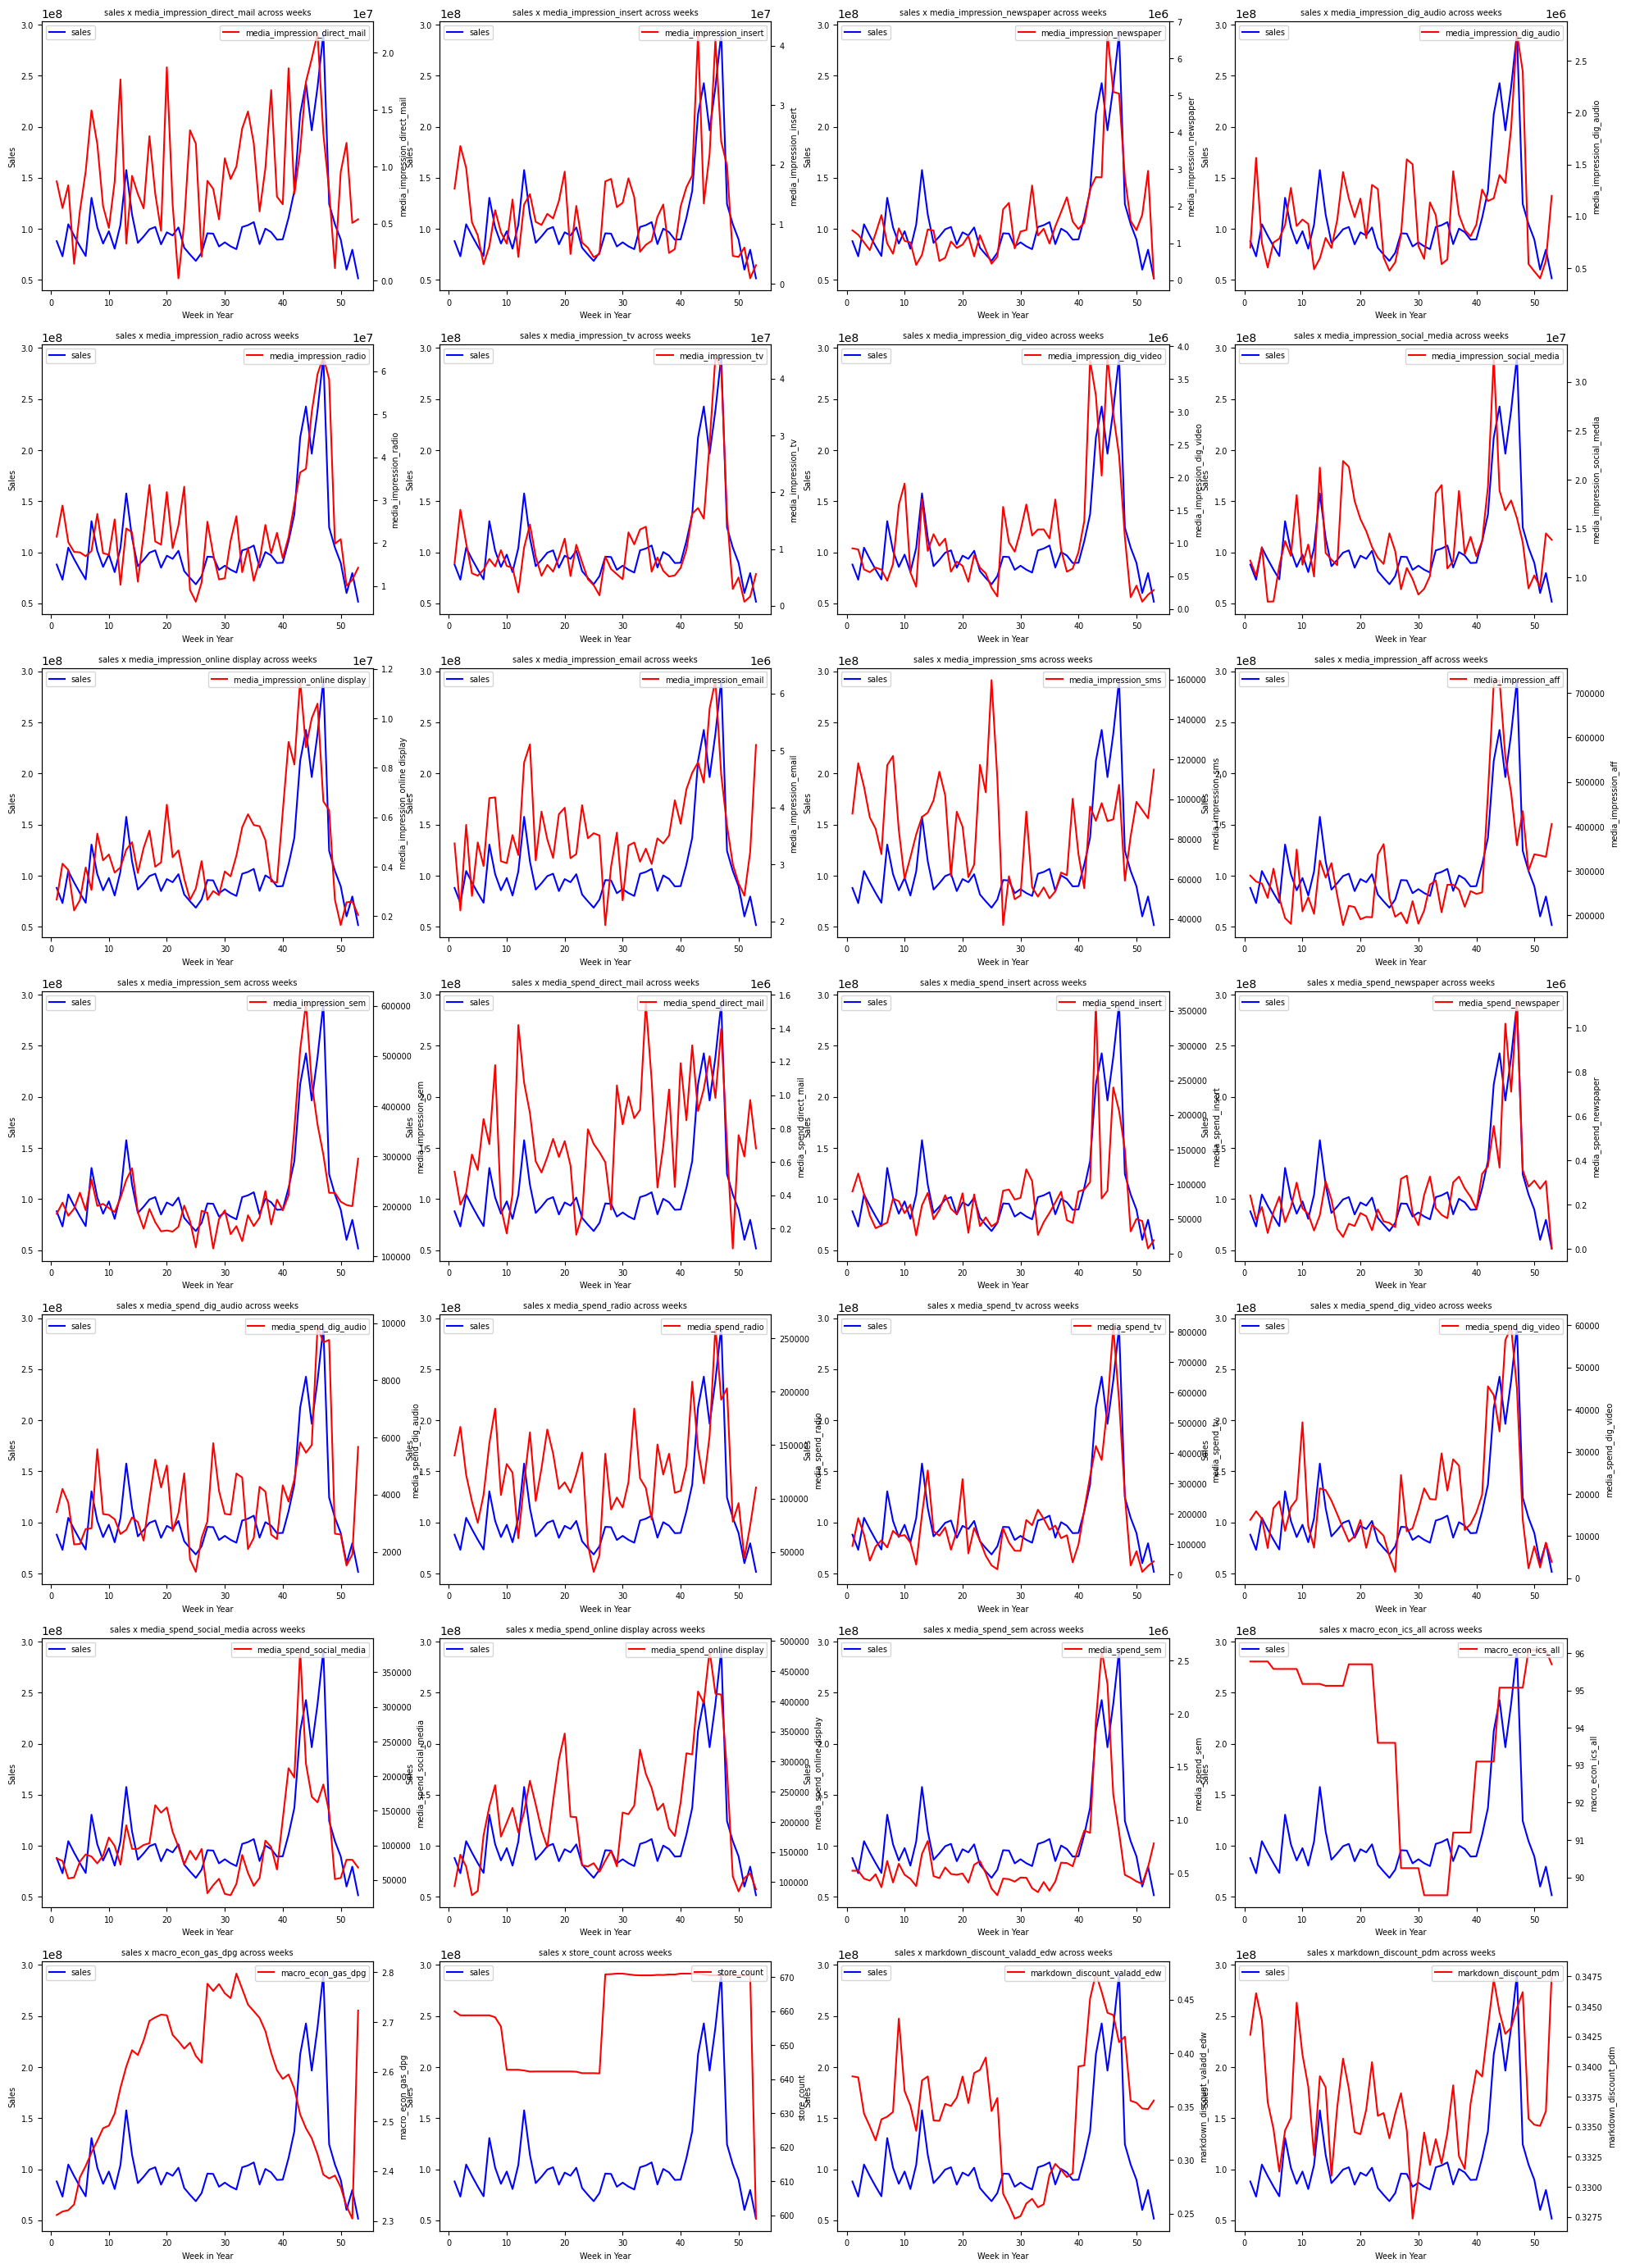

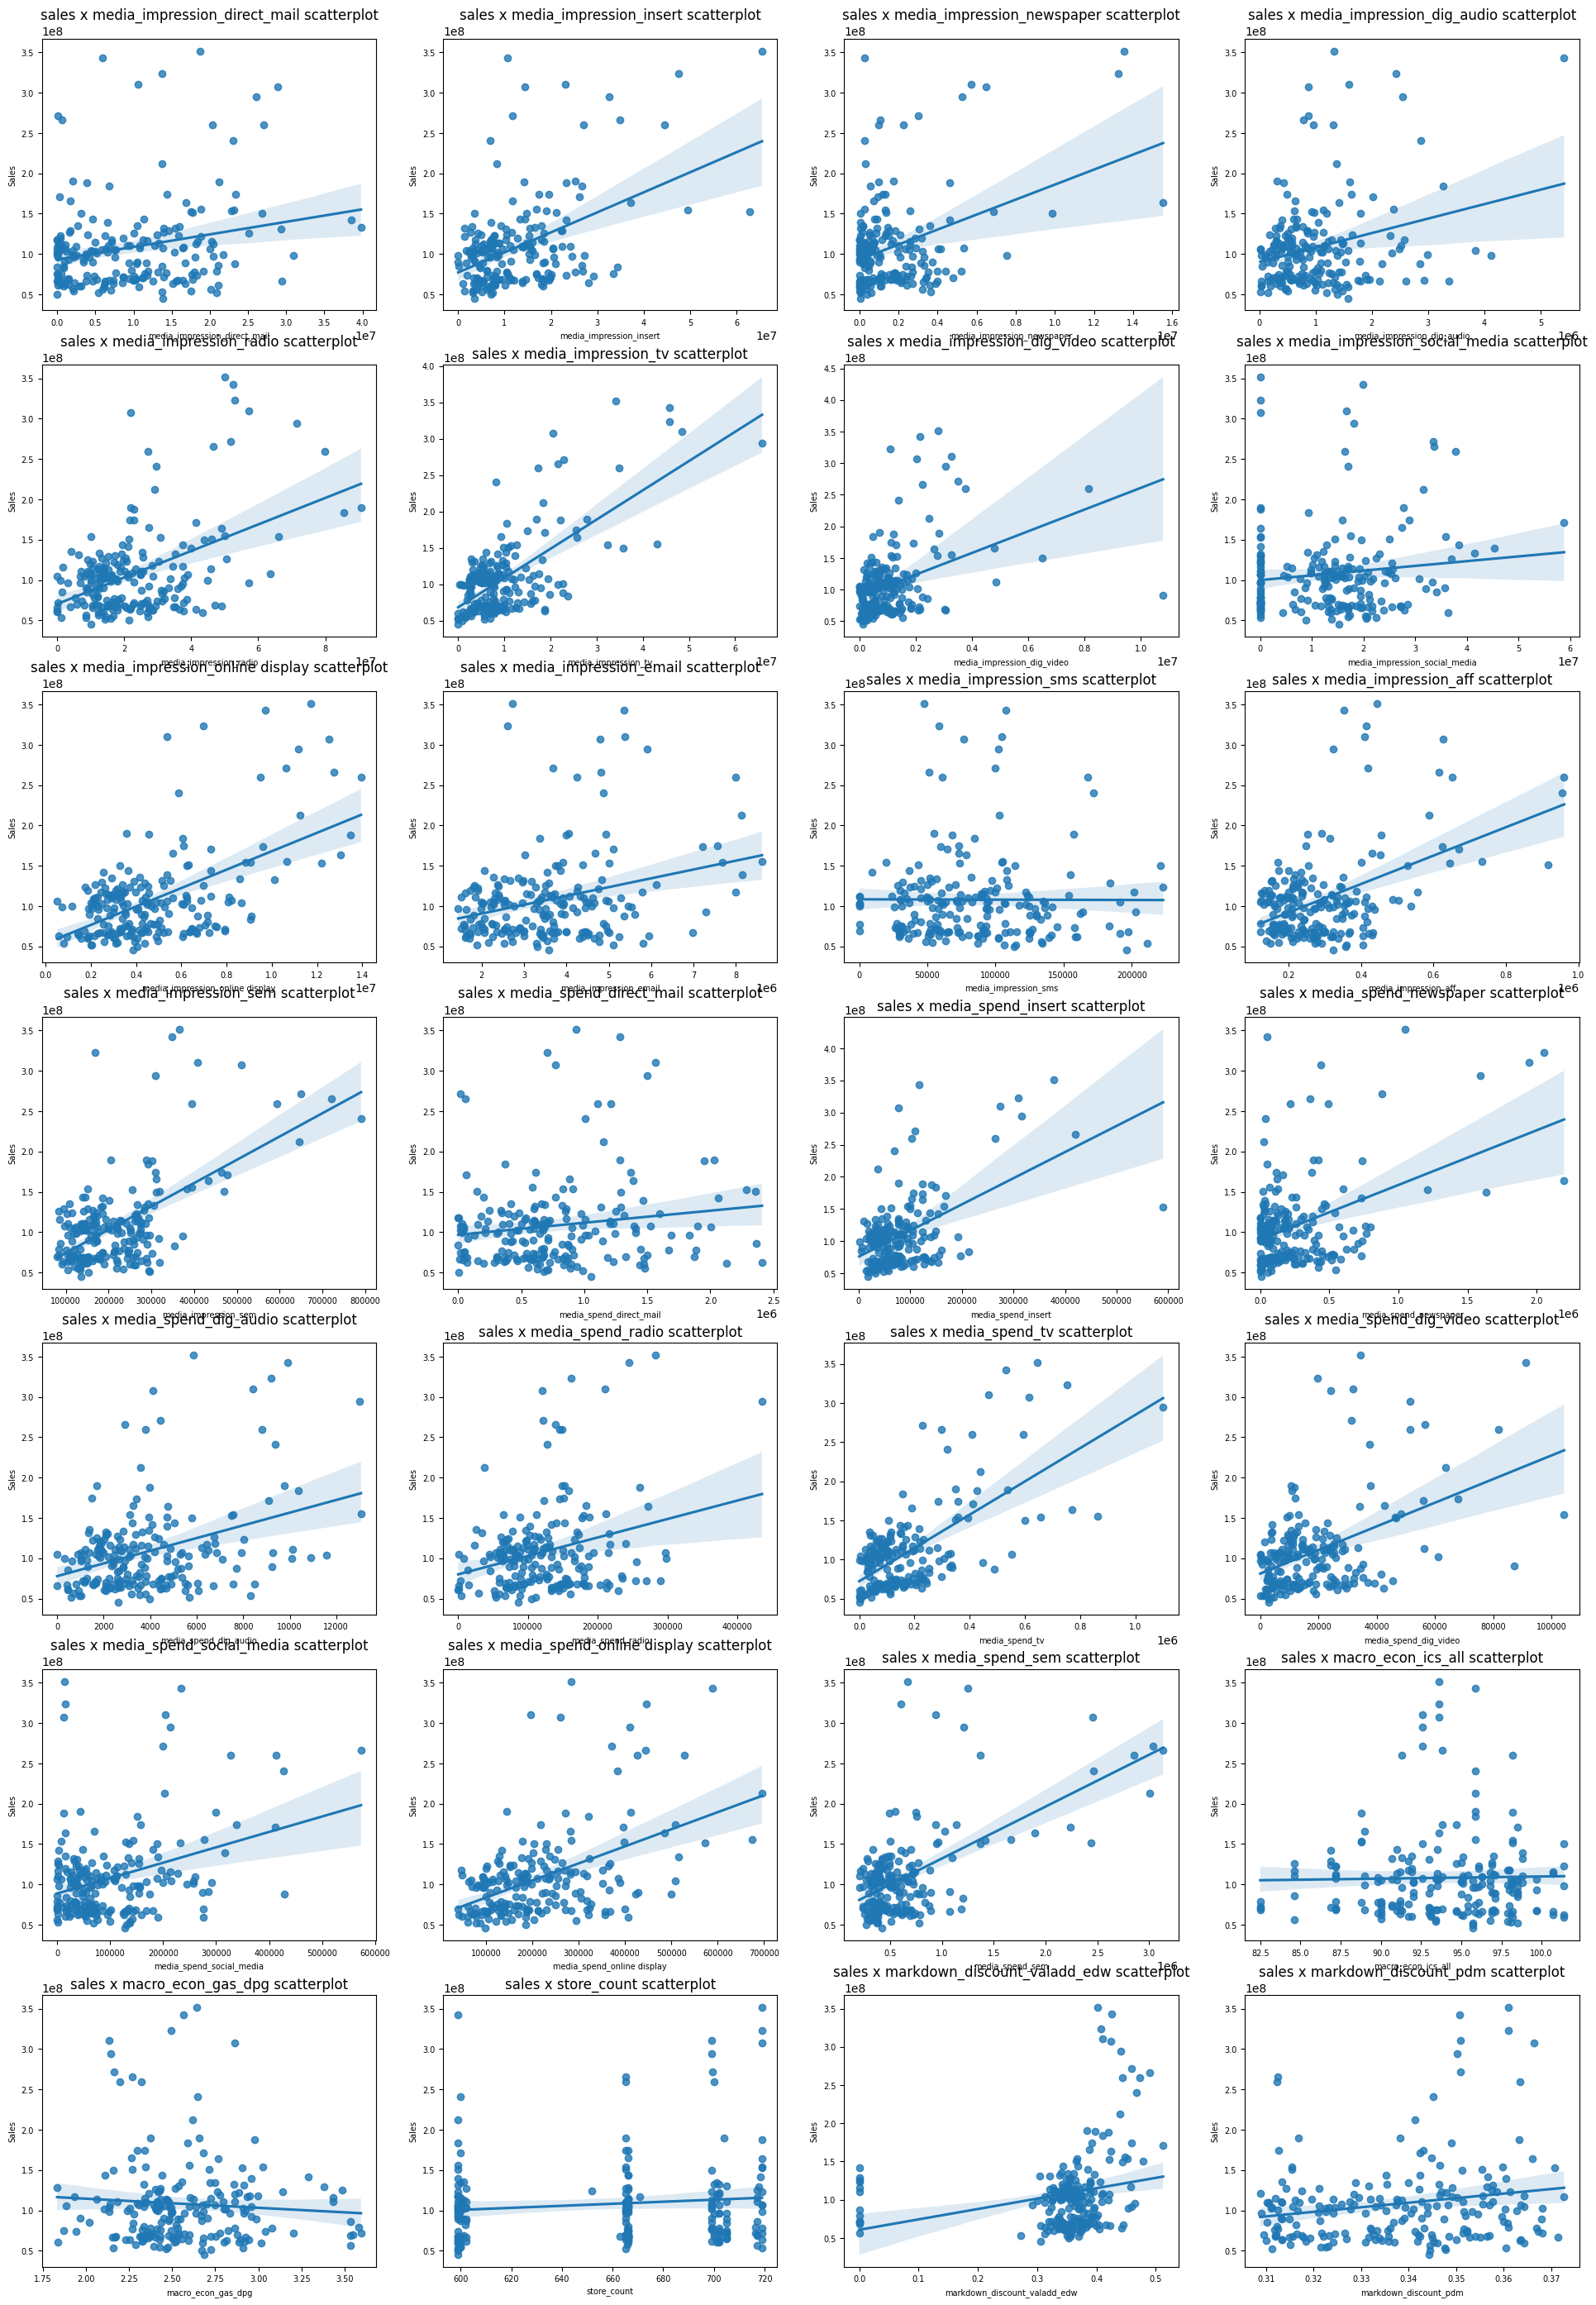

In [11]:
"""

Media spend/impressions and sales  over time

"""

colors = ['#747FE3', '#8EE35D', '#E37346','#090a09']
plt.figure(figsize=(24,35))
for col in enumerate(continuous_column):
    plt.subplot(7,4,col[0]+1)
    ax = sns.lineplot(data = mmm_df3,x = "week_in_year", y = target_column[0],color = 'blue',ci = None)
    ax.legend(['sales'],loc = "upper left",fontsize= 7)
    ax2 = ax.twinx()
    sns.lineplot(data = mmm_df3,x = "week_in_year", y = col[1],ax=ax2,color = 'red',ci = None)
    ax2.legend([col[1]],loc = "upper right",fontsize= 7)
    title = f"sales x {col[1]} across weeks"   
    ax.set_title(title,fontsize= 7)    
    ax.set_xlabel('Week in Year',fontsize= 7)
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.set_ylabel('Sales',fontsize= 7)
    ax2.set_ylabel(col[1],fontsize= 7)
    ax2.tick_params(axis='y', labelsize=7)

    # plt.show()

    # Scatterplot

plt.figure(figsize=(24,35))
for col in enumerate(continuous_column):
    plt.subplot(7,4,col[0]+1)
    # plt.figure().set_figwidth(8)
    # plt.figure().set_figheight(2)
    ay = sns.regplot(data=mmm_df3,x=col[1],y=target_column[0])
    ay.set_xlabel(col[1],fontsize= 7)
    ay.set_ylabel('Sales',fontsize= 7)
    ay.tick_params(axis='x', labelsize=7)
    ay.tick_params(axis='y', labelsize=7)

    title = f"sales x {col[1]} scatterplot"   
    plt.title(title)
    # plt.show()

    


### Studying Lagged effect of Media Spend with Sales

- We want to study ad-stock (How many weeks after the Ad was aired, did we start seeing sales impact). To do this, we created a lag variable of the important media channels and plotted it along with weekly Sales.

- We observe that there is a lagged spike in sales after an increased media spend. Next steps would be to model this lagged impact to get an precise understanding.

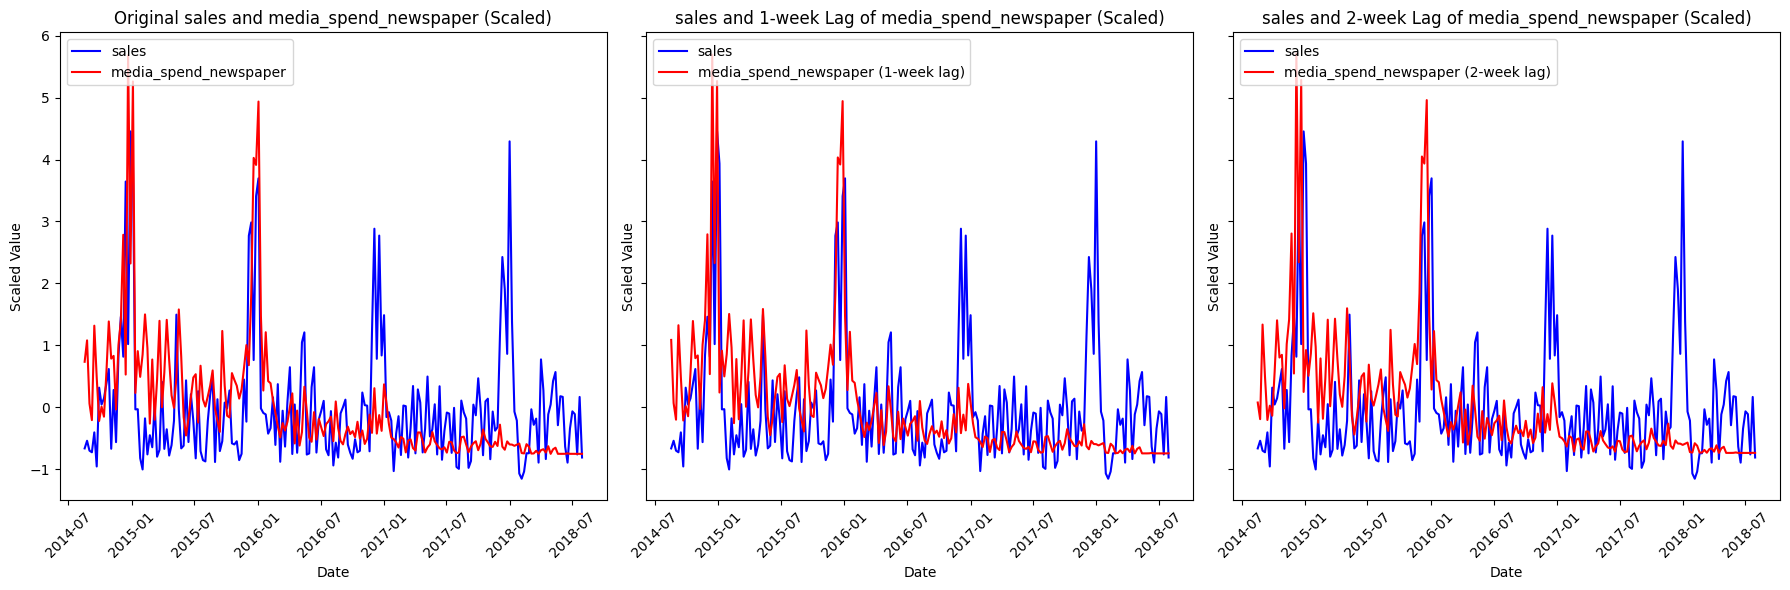

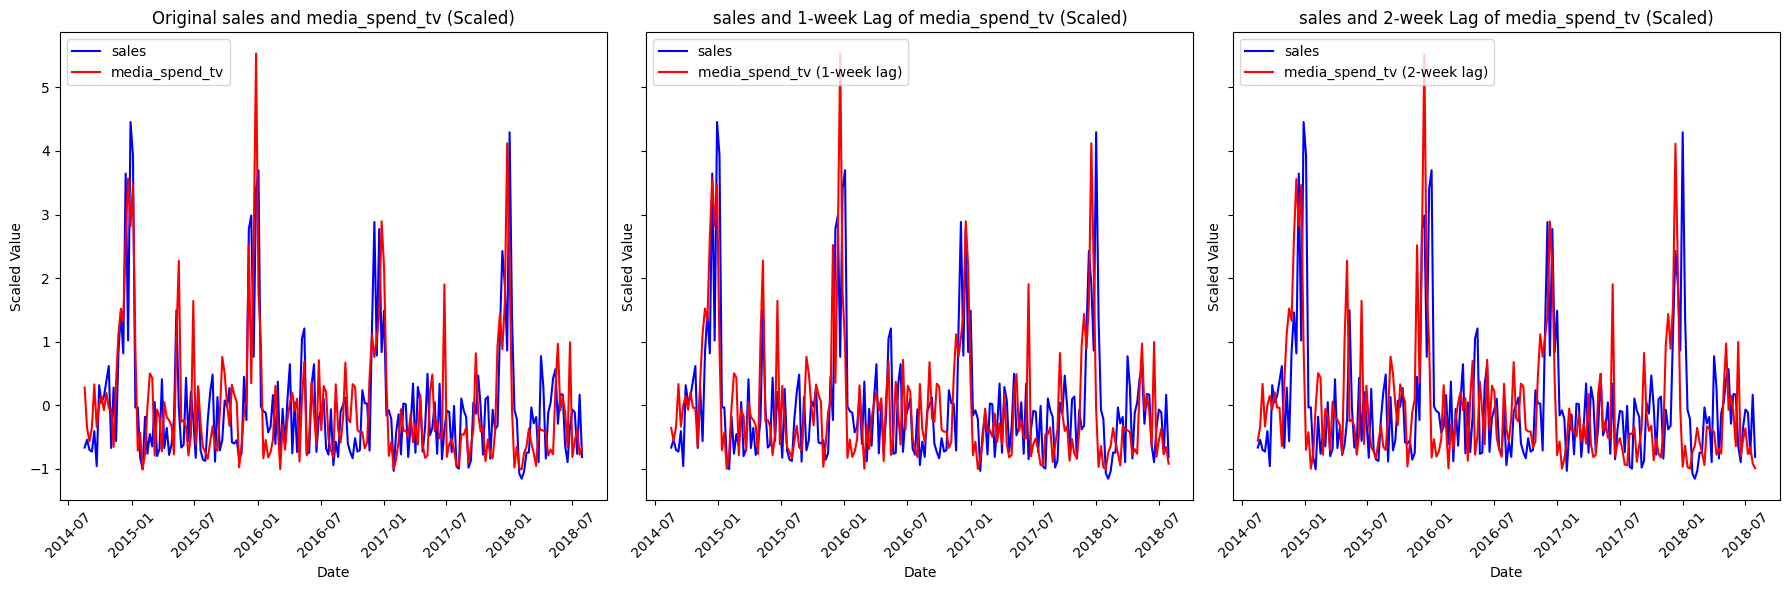

In [36]:
plot_line_charts_with_lags(mmm_df3, 'media_spend_newspaper')

plot_line_charts_with_lags(mmm_df3, 'media_spend_tv')

plot_line_charts_with_lags(mmm_df3, 'media_spend_online display')

### Sales analysis during Holidays

- To test the impact of seasonality, we tracked Sales across holidays. We observe that the median sales during most holidays is higher than non- holidays.


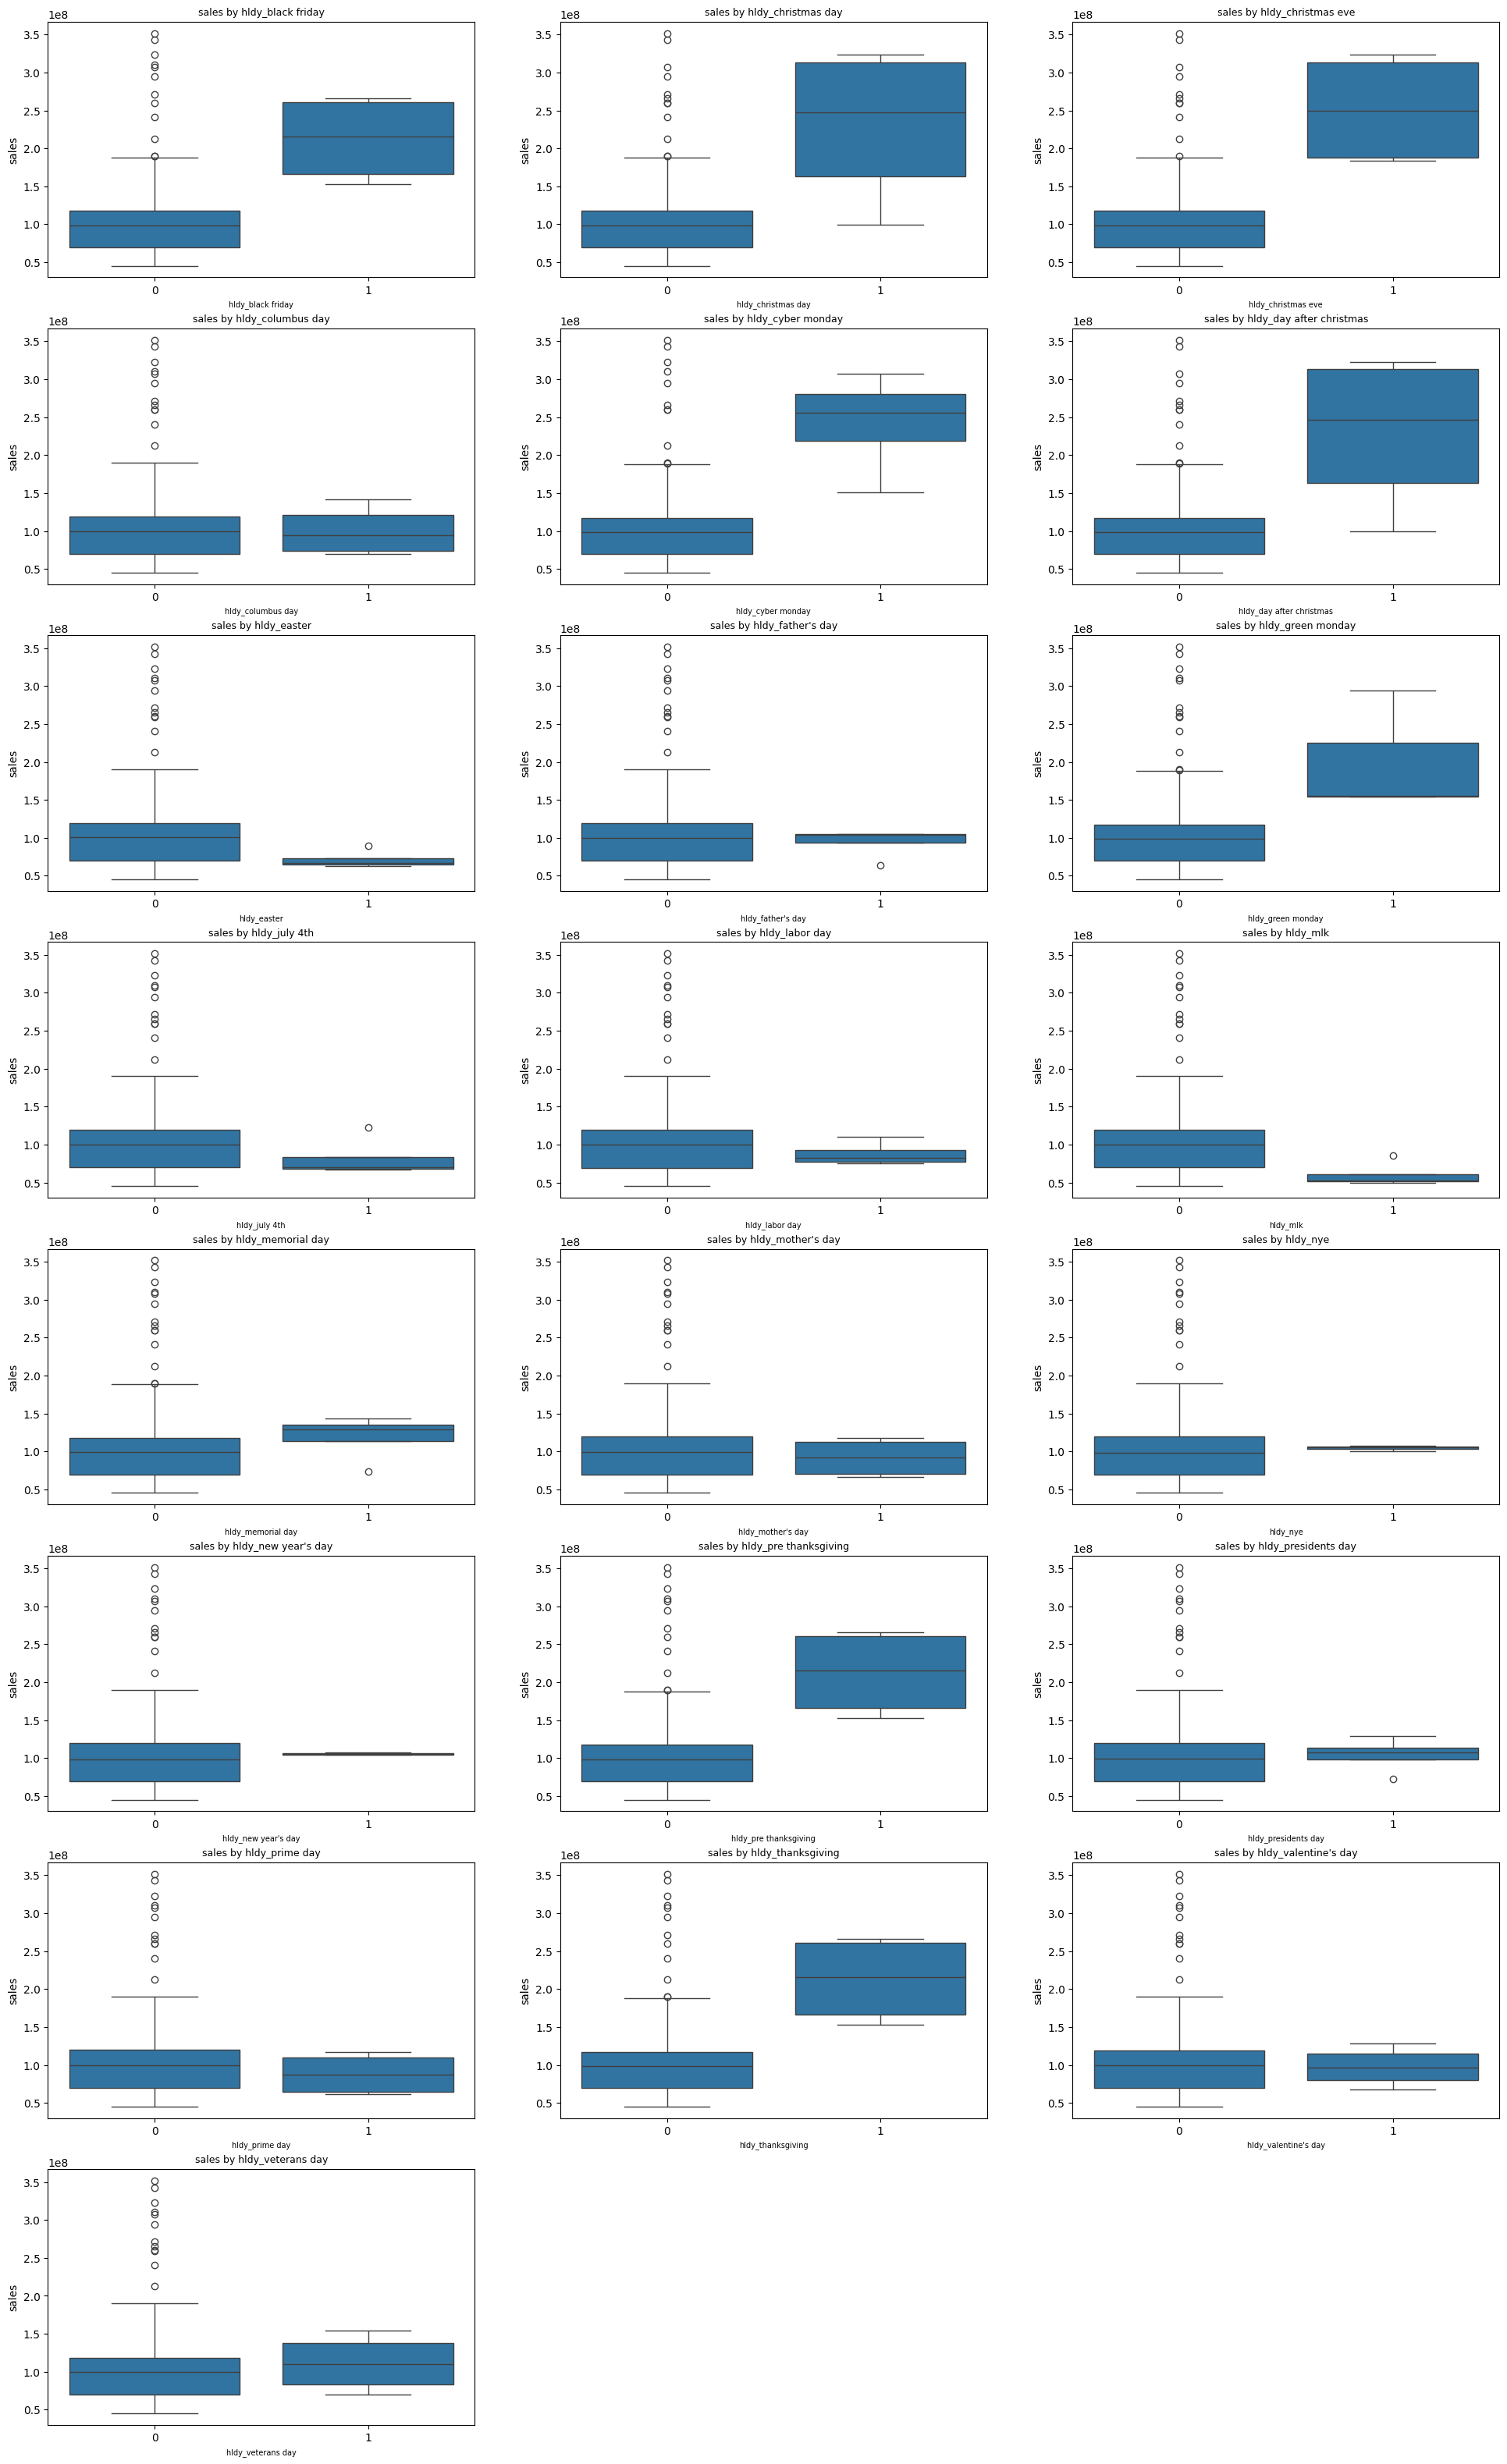

In [12]:
"""

Sales during holidays and Impressions during holidays



"""
plt.figure(figsize=(24,40))
for col in enumerate(one_hot_encoded_columns):
    if 'hldy' in col[1]:
        plt.subplot(8,3,col[0]+1)
        ax = sns.boxplot(data=mmm_df2,y = target_column[0],x = col[1])
        ax.set_xlabel(col[1],fontsize= 7)
        title = f"sales by {col[1]}"
        ax.set_title(title,fontsize= 9) 


#### Correlation Analysis

- We filter out for those variables that have a correlation of > 0.5 or < -0.5. 

- We oberve that most Media spends in TV, Online Display and SEM have a higher correlation with sales than other types of media spends.

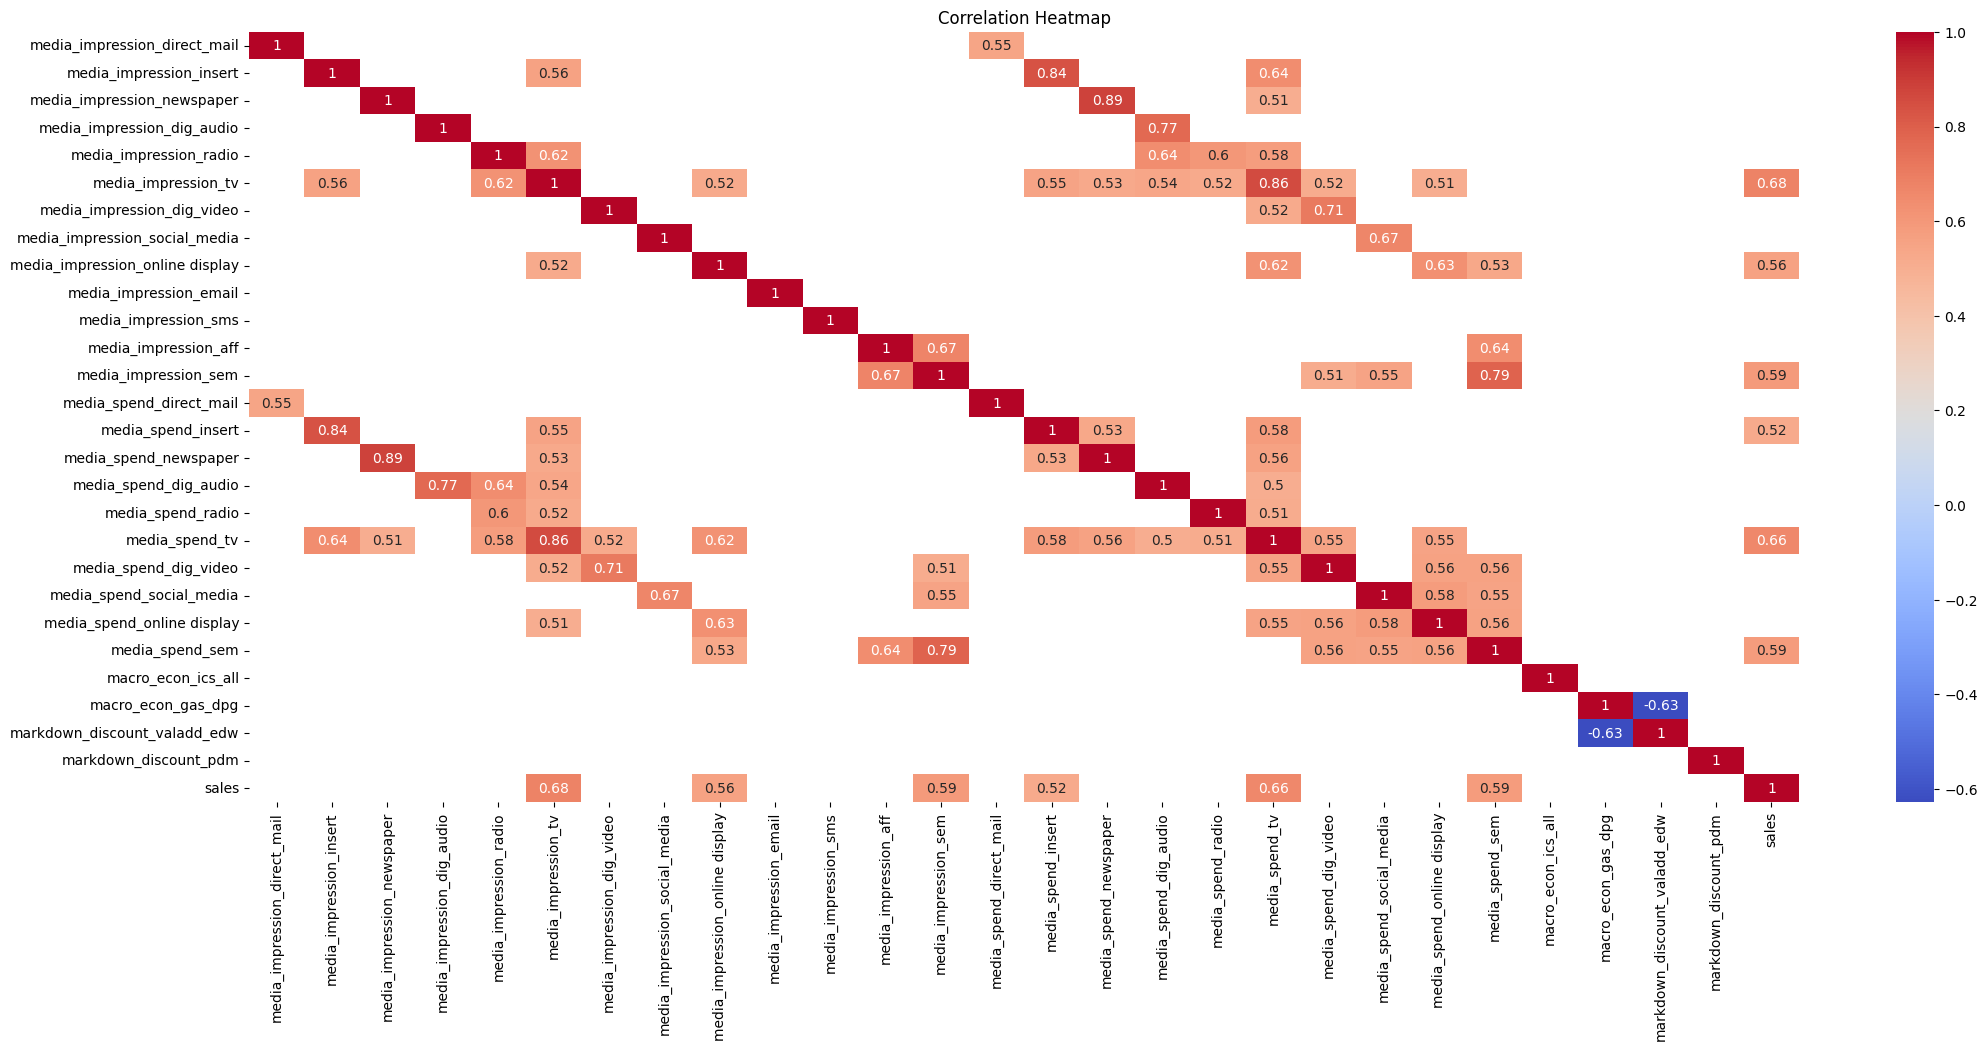

In [33]:
correlation_matrix = mmm_df2[[i for i in continuous_column+target_column if 'store_count' not in i]].corr()
sales_correlations = correlation_matrix['sales'].sort_values(ascending=False)
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix[(correlation_matrix<-0.5) | (correlation_matrix>0.5)], annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## <u>Modelling</u>

The final intention of the analysis is to:
- Understand and quantify Ad-Stock of each of the Ad channels
- Evaluate Diminishing Returns
- Optimize Spend

We have run a baseline model (XGBoost performed best). This was done to get an initial understanding of how our independant features are explaining the target variable.

To be noted: This is not the main goal of the analysis. It will be used in the last step(Optimizing costs). 

We get a MAPE of 32%.

On conducting a <u>Shapley Analysis to understand the marginal impact of features on target</u> - we see that media impressions for sem's and online displays are the top drivers of Sales.

Further exploring the impact of features on the target, using Shapley dependance plots- 

&emsp; 1) Online Display media spend has a huge positive correlation with sales- although spending more than $300k per week is not yeilding in an increased weekly sales.

&emsp; 2) Media spend on TV has a positive impact on sales once spend cross $30k per week.




In [15]:
"""

Run XGB Regressor

"""

independant_columns = [i for i in continuous_column+one_hot_encoded_columns+date_columns if 'week_start_date' not in i]
X = mmm_df2[independant_columns]
y = mmm_df2[target_column]

# Using the train test split function
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.25, shuffle=True)

print(X_train.shape,X_test.shape)


# Define Hyperparameters
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }


#Define Model
xgb_model = XGBRegressor()


# Define KFold  and RandoSearch CV
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
random_search_le = RandomizedSearchCV(estimator=xgb_model,
                                    param_distributions=param_tuning,
                                    cv=cv,
                                    n_jobs=-2,
                                    verbose = 2,
                                    )

random_search_le.fit(X_train,y_train)

print(random_search_le.best_params_)

# Run new model for best params
new_model = XGBRegressor(random_state=6,**random_search_le.best_params_)

new_model.fit(X_train,y_train)

#predict on new model
prediction = new_model.predict(X_test)


# Calculate accuracy
print("MAPE", mean_absolute_percentage_error(y_test,prediction)*100)


(156, 74) (53, 74)
Fitting 15 folds for each of 10 candidates, totalling 150 fits
{'subsample': 0.5, 'objective': 'reg:squarederror', 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
MAPE 32.43718711043576


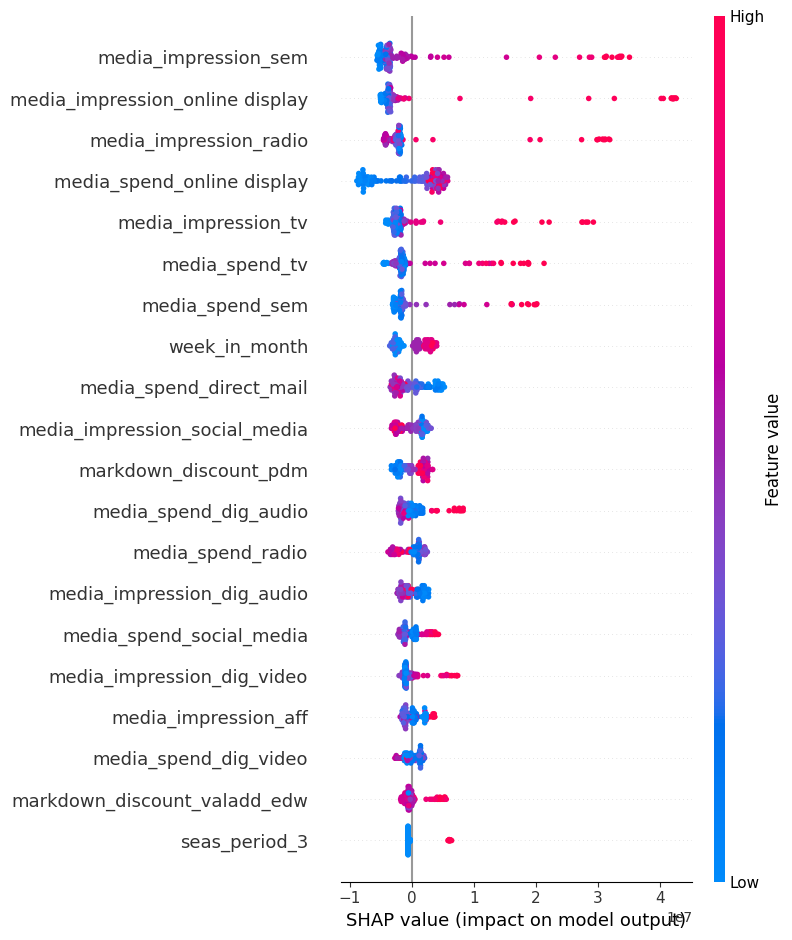

In [16]:
# Shap Analysis

"""

Shapley Analysis of Model

"""

shap_values_explainer = shap.TreeExplainer(model =new_model)
shap_values = shap_values_explainer.shap_values(X_train)

# Shapley Summary plot
shap.initjs()
shap.summary_plot(shap_values, X_train)

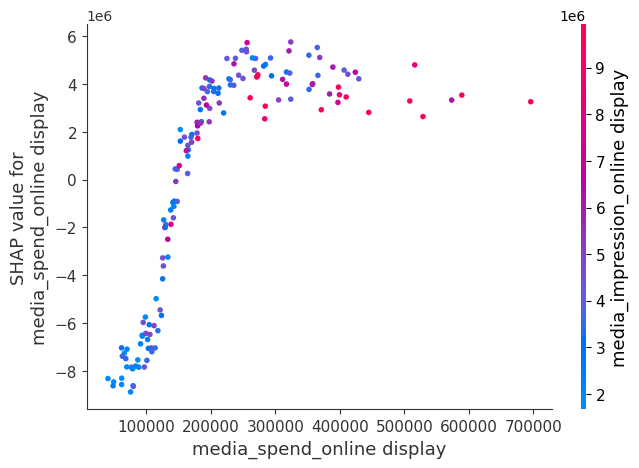

In [17]:
"""

Shapley Partial Dependance Plot - Impact of Online Display Media Spend on Sales.

"""

shap.dependence_plot('media_spend_online display', shap_values, X_train,interaction_index='media_impression_online display')

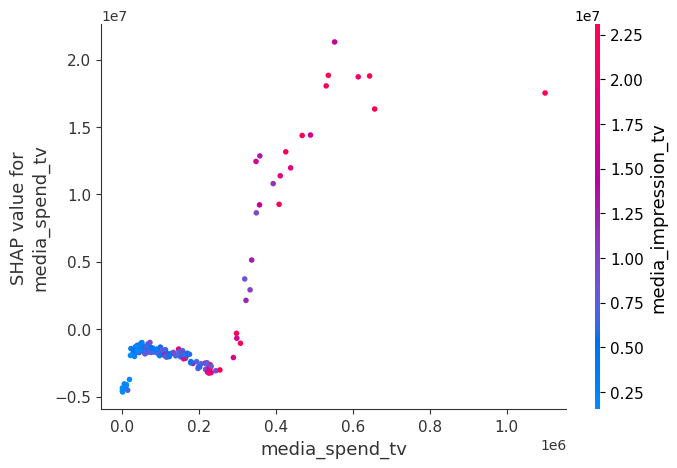

In [18]:
"""

Shapley Partial Dependance Plot - Impact of Online TV Media Spend on Sales.

"""

shap.dependence_plot('media_spend_tv', shap_values, X_train,interaction_index='media_impression_tv')

## <u> Problems, Challenges and Next Steps </u>

No challenges have been faced yet at this stage of the project

<u> Next Steps:</u>

- Approach 1: Use Bayesian methods to calculate Ad-Stock and Diminishing Returns

- Budget Optimization calculation based on output of above steps.

- Approach 2: Create required lag columns - conduct Shapley analysis of Ad-stock and Diminishing returns

Timelines - We are on track as per our tracker. To be completed by the 3rd week of April.
